<font color='blue'>

## Project 1 Submission
</font>

* Student name: <font color='blue'>Keith Van Doren</font>
* Student pace: <font color='blue'>self paced</font>
* Scheduled project review date/time:<font color='blue'> 7/14/20 2:00PM EST</font>
* Instructor name: <font color='blue'> Jeff Herman</font>
* Blog post URL: <font color='blue'>https://medium.com/@kvd51/enhance-python-plots-with-simple-dynamic-annotations-d7ac132bf20?source=friends_link&sk=526a4db12d3c32219eee19fe3f8ea947</font>


<font color='blue'>
    
### The goal of this project is to build a model that predicts residential housing sales prices based on the kc housing data set. To build the model, I will perform IDA and clean the data, perform EDA, and finally perform recursive feature selection with cross validation.
</font>

<font color='blue'>
    
#### Begin by importing needed libraries
</font>

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib as mpl
from datetime import datetime
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
import math

from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

<font color='blue'>

#### Import the dataset and review the import with df.head()
</font>

In [69]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

<font color='blue'>

# Perform IDA and clean the data
</font>

In [70]:
#Attain info and summary stats for the data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [71]:
#A couple columns are set as objects, so check them for categorical data
df['date'].unique()
df['sqft_basement'].unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [72]:
#The date field looks ok, but sqft_basement has '?' as values. Change '?' to NaN and check how many NaN there are 
#across all columns
df['sqft_basement'] = df['sqft_basement'].apply(pd.to_numeric, errors='coerce')
df[['sqft_basement']] = df[['sqft_basement']].astype('str')
df[['sqft_basement']] = df[['sqft_basement']].astype('float')
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Text(0.5, 0.98, 'Histograms of NaN Columns')

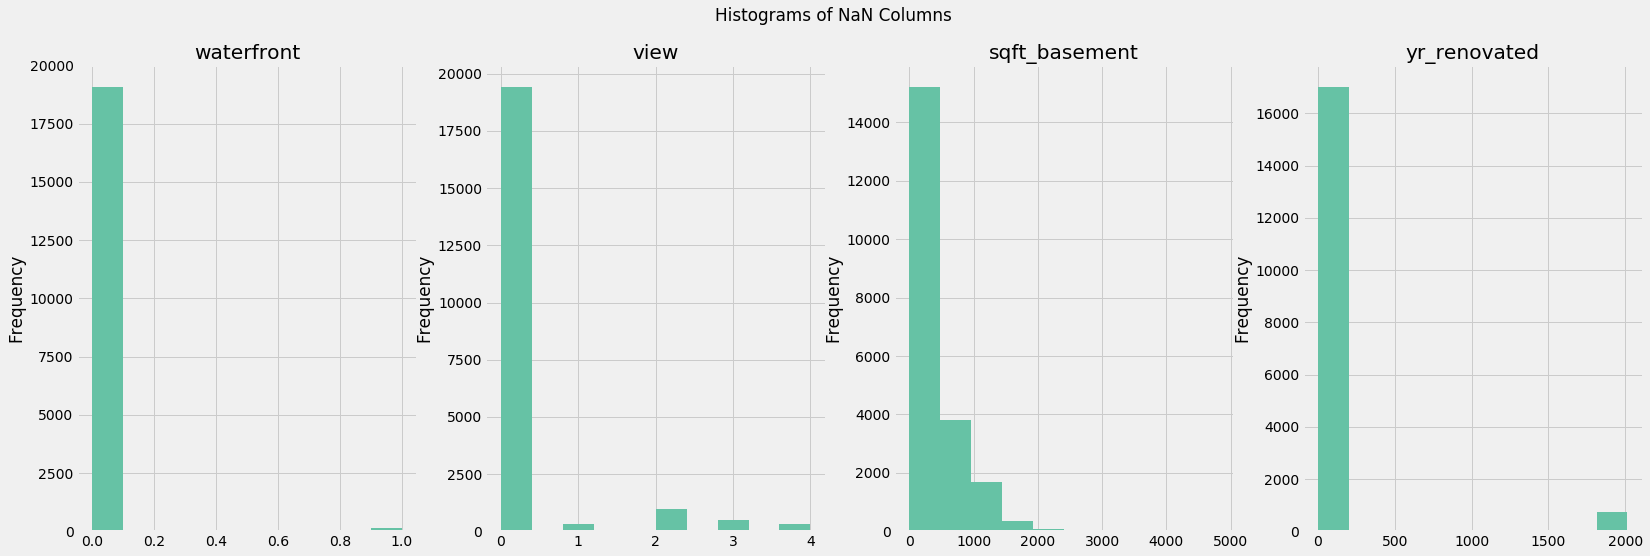

In [73]:
#Determine the best way to deal with the missing data. First, check the distributions of each column that has missing data
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')

cols = ['waterfront', 'view', 'sqft_basement', 'yr_renovated']
fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4, figsize=(25,8))
fig.suptitle('Histograms of NaN Columns')
axs = [ax1, ax2, ax3, ax4]
for i, col in enumerate(cols):
    df[col].plot(kind='hist', ax=axs[i], title=col);

<font color='blue'>

##### Observations:  
* 'Waterfront' is binomial, and 99% of the properties with a value have a value of 0. I will assume 0 for the 2376 missing values.
* 'View' is stratified from 0 to 4, with approx 90% being 0. I could assume 0 for the 63 missing values, but I will simply delete the rows because it's not that many rows and I feel like randomly assigning a value based on the distribution might yield unrealistic results.
* 'Sqft_basement' appears to have a log normal distribution, so I will use the median of the distribution for the 454 missing values.
* 'yr_renovated' appears to be 0 for approx 95% of the properties that have a value. It could be that a 0 value means that a property was not renovated (not missing data). but it could also mean that the year of renovation is not known. Given that there are 3842 properties that are missing a value and that I cannot make up a year for when a house might have been renovated, I will simply delete the column.
</font>

In [74]:
#Make changes based on the above observations.
df2 = df.copy()
df2['waterfront'] = df2['waterfront'].fillna(value=0)
df2['sqft_basement'] = df2['sqft_basement'].fillna(value=df2['sqft_basement'].median())
df2.dropna(subset=['view'], inplace=True)
df2.drop('yr_renovated', axis=1, inplace=True)

#Check that changes were accurately made
df2.isna().sum()
df2.info()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21534 non-null  int64  
 1   date           21534 non-null  object 
 2   price          21534 non-null  float64
 3   bedrooms       21534 non-null  int64  
 4   bathrooms      21534 non-null  float64
 5   sqft_living    21534 non-null  int64  
 6   sqft_lot       21534 non-null  int64  
 7   floors         21534 non-null  float64
 8   waterfront     21534 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21534 non-null  int64  
 11  grade          21534 non-null  int64  
 12  sqft_above     21534 non-null  int64  
 13  sqft_basement  21534 non-null  float64
 14  yr_built       21534 non-null  int64  
 15  zipcode        21534 non-null  int64  
 16  lat            21534 non-null  float64
 17  long           21534 non-null  float64
 18  sqft_l

In [75]:
#Now do a further check for extraneous values
for col in df2.columns:
    print(col, '\n', df2[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006594
6/25/2014    0.006083
6/26/2014    0.006083
7/8/2014     0.005898
4/27/2015    0.005758
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454676
4    0.318798
2    0.127891
5    0.074115
6    0.012538
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006408
1400    0.006223
1440    0.006176
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016578
6000    0.013467
4000    0.011656
7200    0.010216
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494242
2.0    0.381304
1.5    

In [76]:
#Based on the 'id' value counts, it appears that one property sold more than once
df2[df2['id']==795000620]

id        date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620   9/24/2014  115000.0         3        1.0         1080   
17589  795000620  12/15/2014  124000.0         3        1.0         1080   
17590  795000620   3/11/2015  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
17588      6250     1.0         0.0   0.0          2      5        1080   
17589      6250     1.0         0.0   0.0          2      5        1080   
17590      6250     1.0         0.0   0.0          2      5        1080   

       sqft_basement  yr_built  zipcode      lat    long  sqft_living15  \
17588            0.0      1950    98168  47.5045 -122.33           1070   
17589            0.0      1950    98168  47.5045 -122.33           1070   
17590            0.0      1950    98168  47.5045 -122.33           1070   

       sqft_lot15  
17588        6250  
17589        6250  
17590        6250

In [77]:
#I will keep the most recent sales price (delete the first two)
df2.drop([17588, 17589], inplace=True)
df2.count()

id               21532
date             21532
price            21532
bedrooms         21532
bathrooms        21532
sqft_living      21532
sqft_lot         21532
floors           21532
waterfront       21532
view             21532
condition        21532
grade            21532
sqft_above       21532
sqft_basement    21532
yr_built         21532
zipcode          21532
lat              21532
long             21532
sqft_living15    21532
sqft_lot15       21532
dtype: int64

<font color='blue'>

# Perform EDA and do additional data cleaning
#### Start with checking plots of possible features/independent variables. I like to begin with scatter plots against the dependent variable/'price' because I immediately get a sense of distributions, correlations, and significance.
#### Next perform single linear regression to check for normality - will use statsmodels to do regression on each possible feature; check fits, errors, qqplots, p-values, r2 values.
</font>

In [78]:
def checknormhet(df, columns, y):
    '''This function will check for normality and heteroskedasticity by using statsmodels qq and resid plots
    '''
    results = []
    for idx, col in enumerate(columns):
        print(f'Regression Check~{col}')
        print('-----------------------')

        f = f'{y}~{col}'
        model = smf.ols(formula=f, data=df).fit()
        fig, axes = plt.subplots(figsize=(15,12))
        fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
        fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
        fig.tight_layout()
        plt.show()

        results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
        #input('ENTER to continue...')  
    return results

def distrgrid(df, columns):
    '''This function will plot a histogram and a box plot for a defined list of columns from a defined dataframe.
    df is a dataframe, columns is a list of column names.
    '''
    for index, col in enumerate(columns):
        ax = plt.subplot(math.ceil(len(columns)/2), 4, index*2+1)
        df[col].plot.hist(ax=ax)
        ax.set_title(col+'-hist', fontsize=20)
        ax2 = plt.subplot(math.ceil(len(columns)/2), 4, index*2+2)
        ax2.set_title(col+'-box', fontsize=20)
        df[col].plot.box(ax=ax2)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    
def normalize(x):
    '''Normalize input array/column data by std
    '''
    return (x - np.mean(x)) / np.std(x)

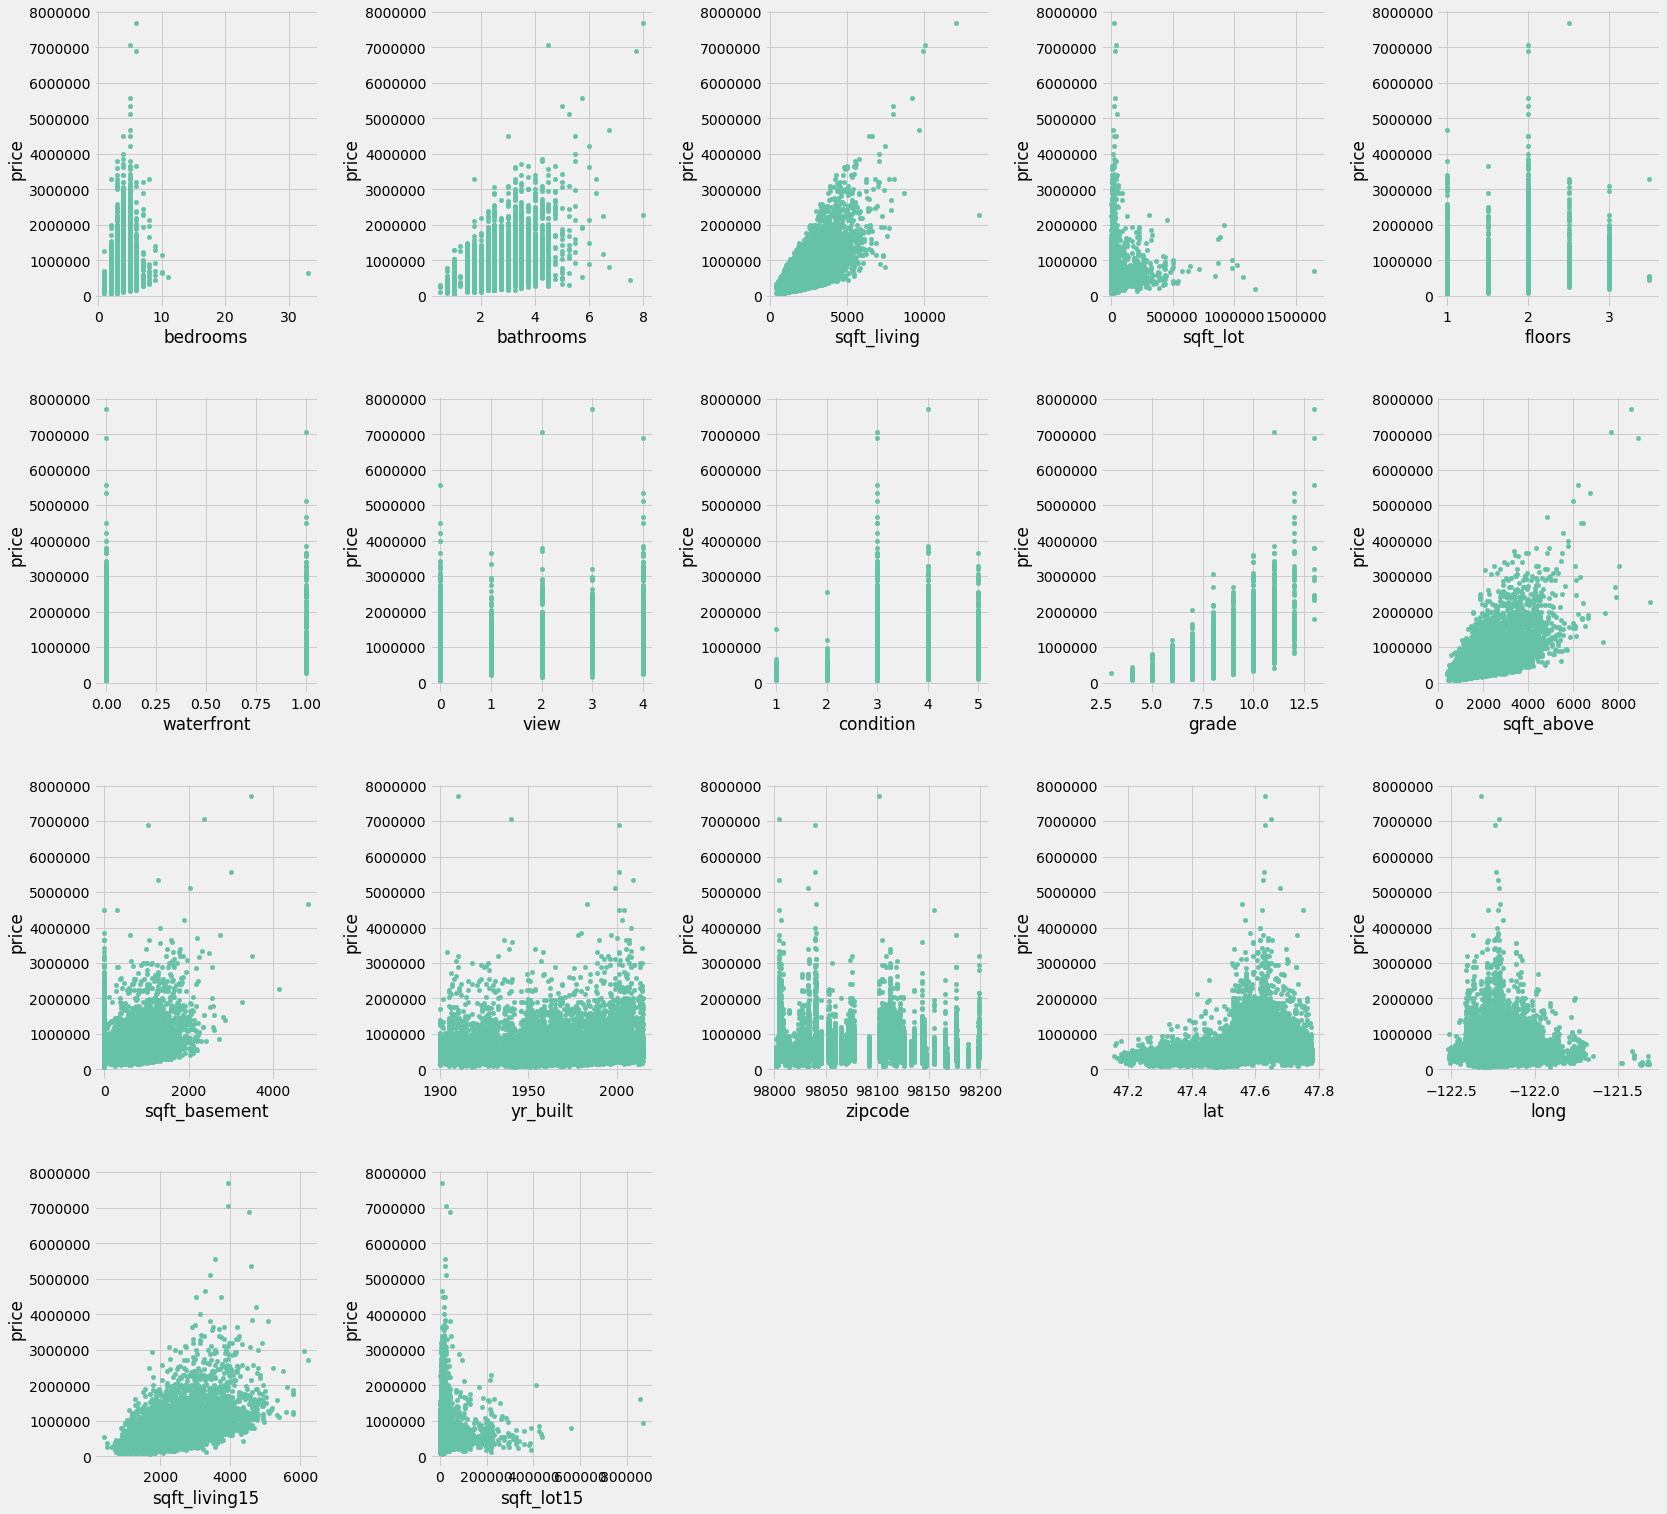

In [79]:
#Scatter plots - possible features against 'price'
df_clean = df2.copy()
columns = df_clean.columns.drop(['id', 'date', 'price']).tolist()

plt.figure(figsize=(25,25))

for index, col in enumerate(columns):
    ax = plt.subplot(4, 5, index+1)
    df_clean.plot.scatter(x=col, y='price', ax=ax)

plt.subplots_adjust(wspace=0.5, hspace=0.3);


Regression Check~bedrooms
-----------------------


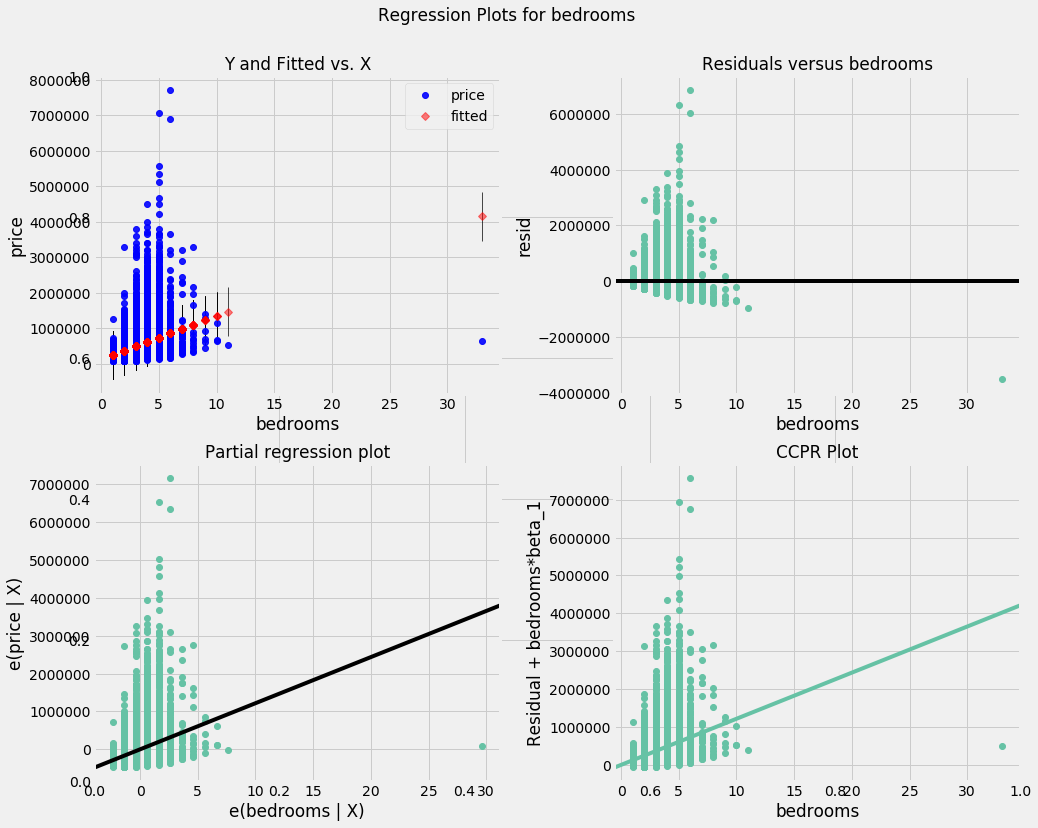

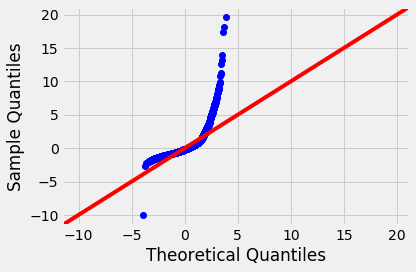

Regression Check~bathrooms
-----------------------


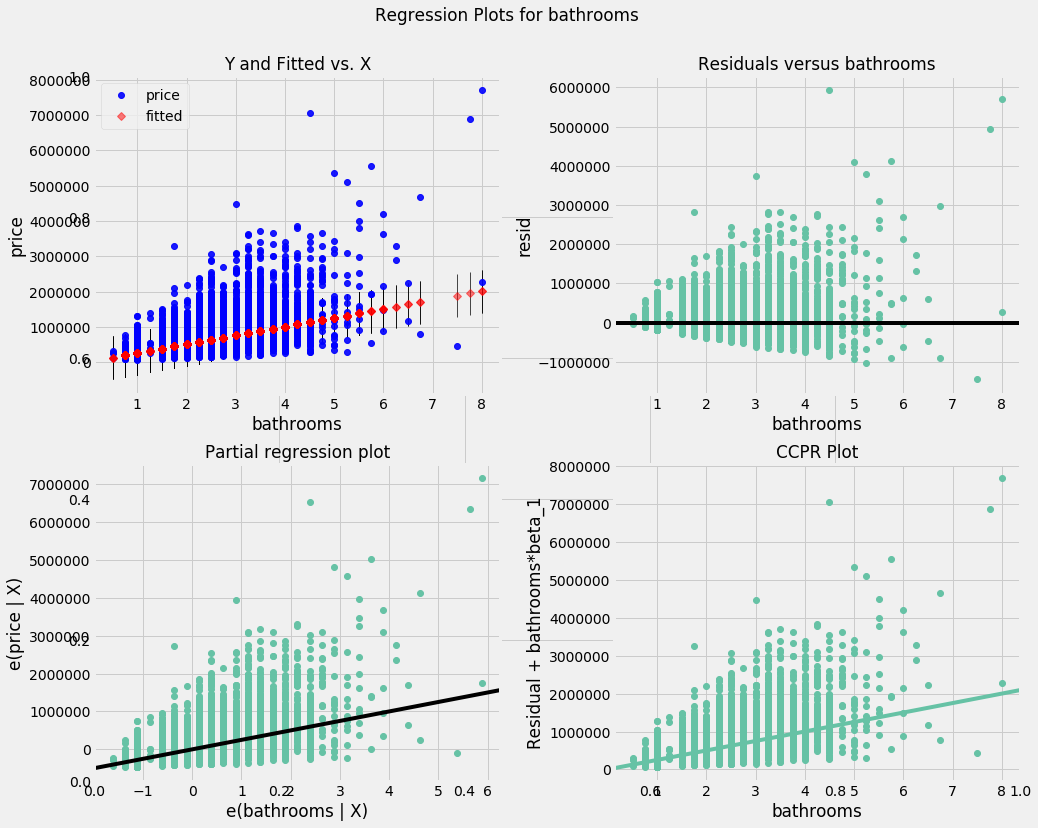

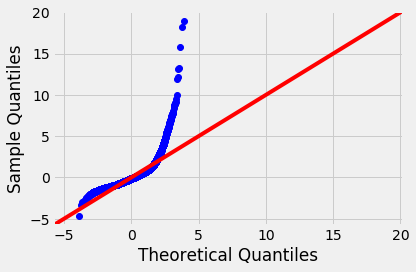

Regression Check~sqft_living
-----------------------


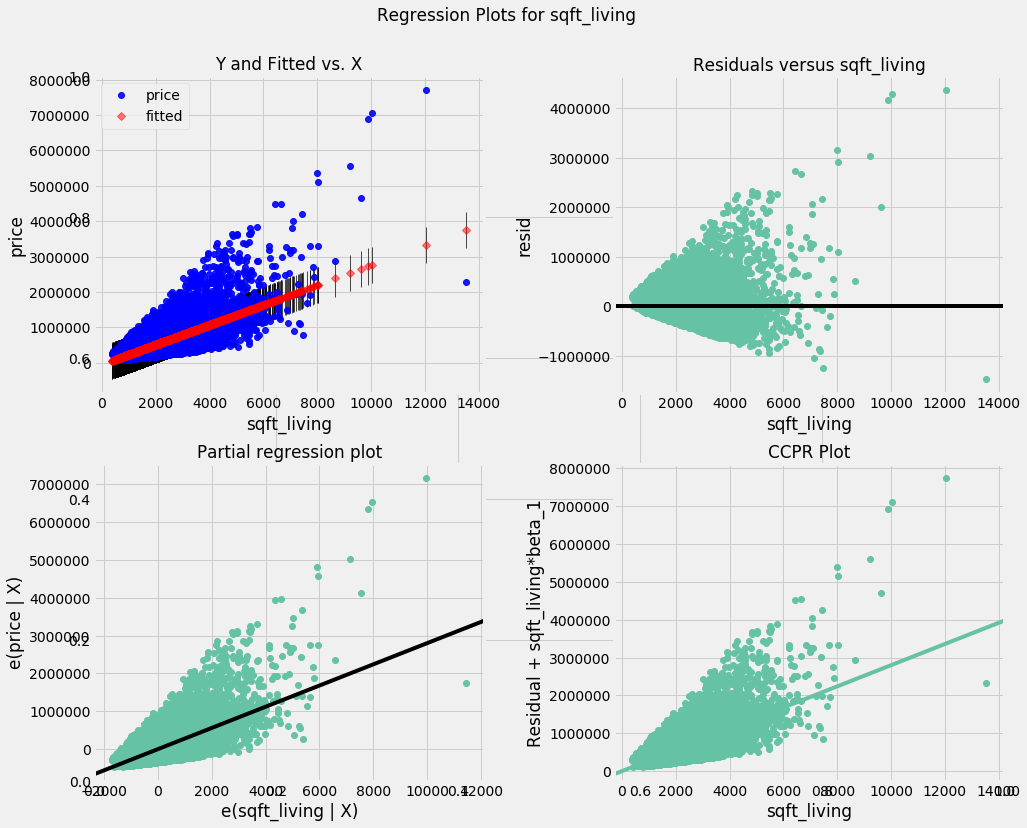

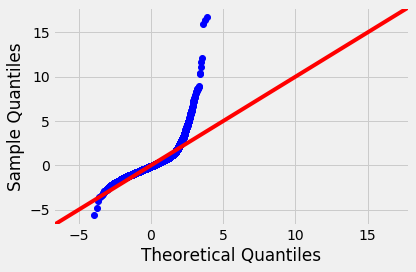

Regression Check~sqft_lot
-----------------------


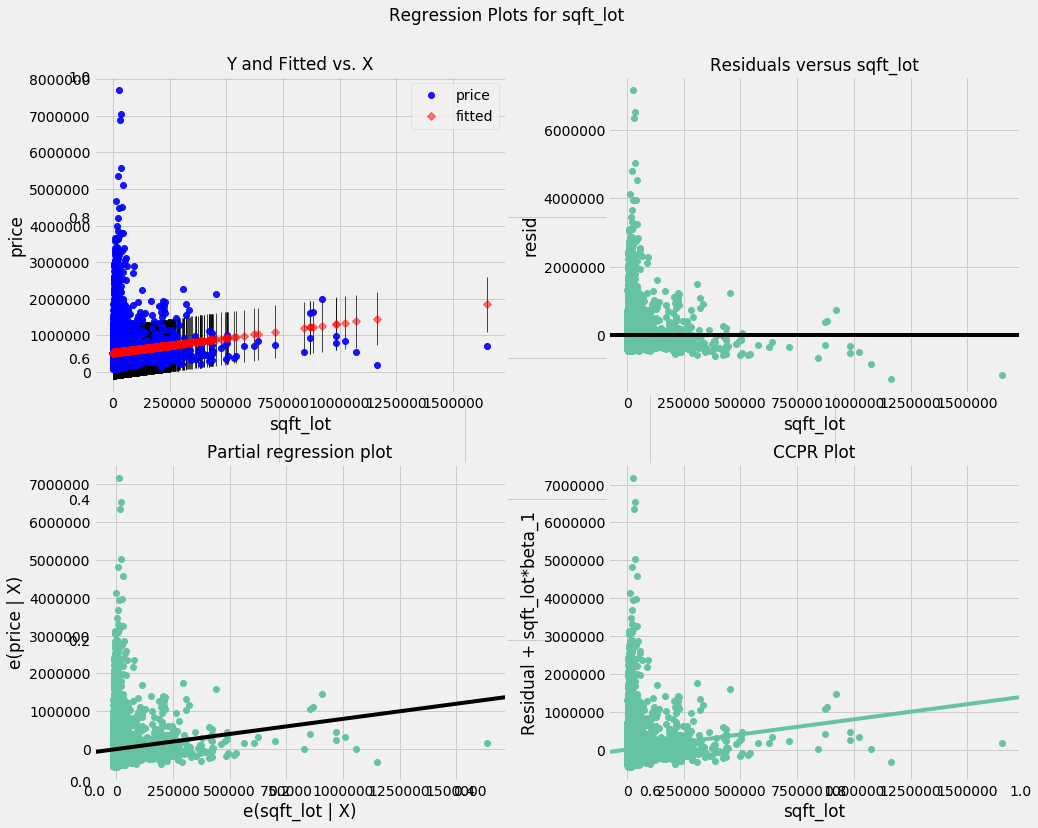

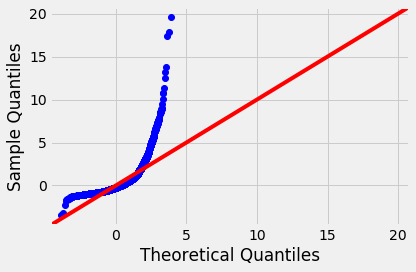

Regression Check~floors
-----------------------


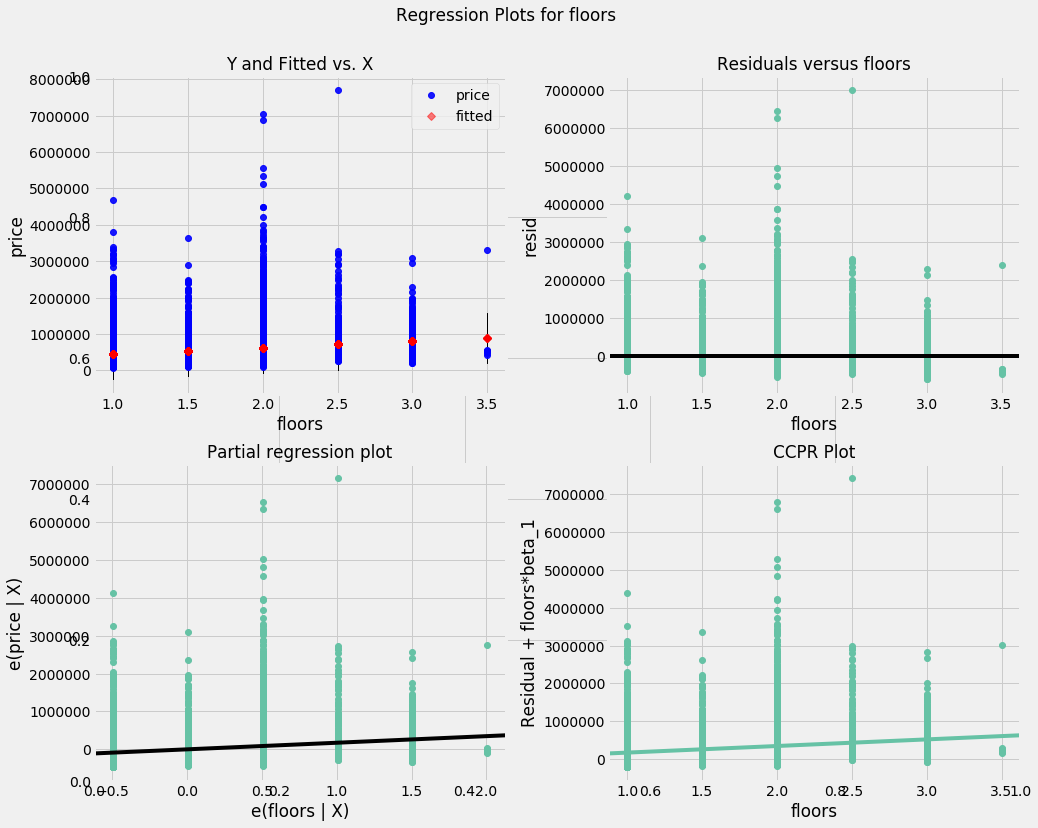

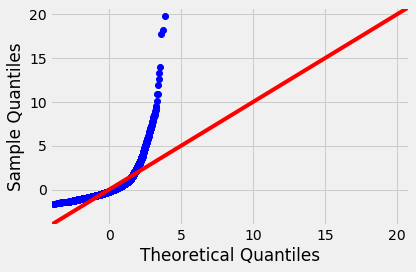

Regression Check~waterfront
-----------------------


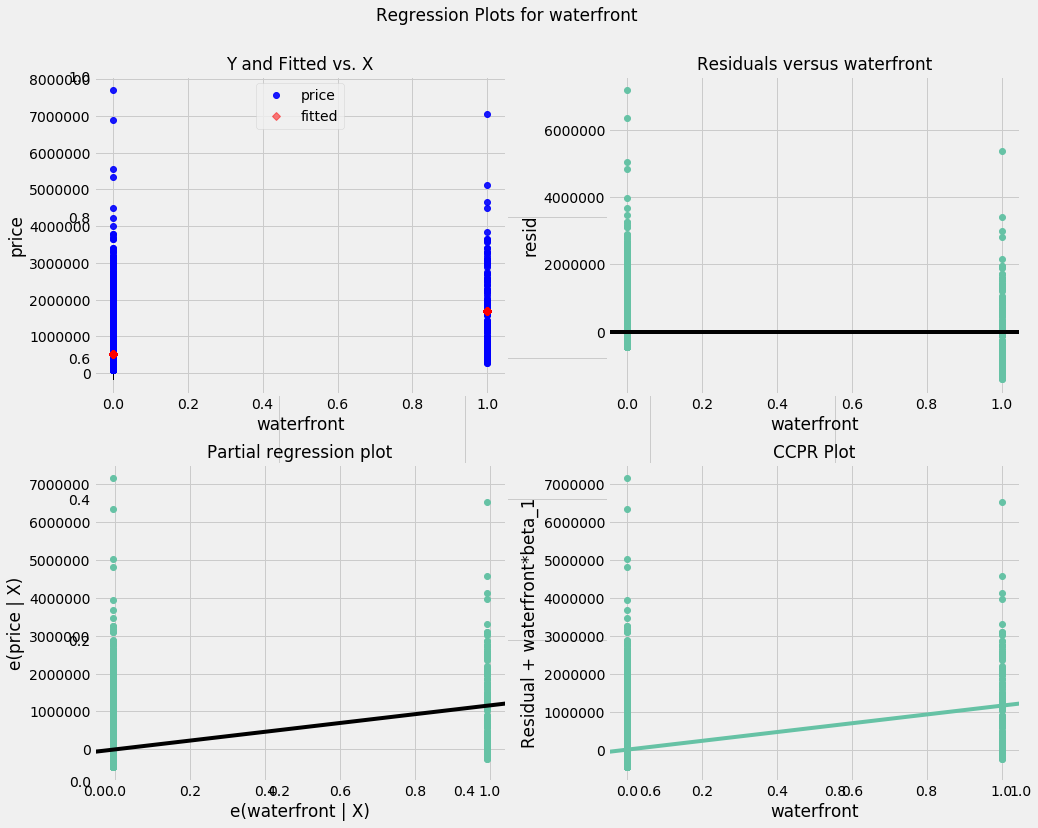

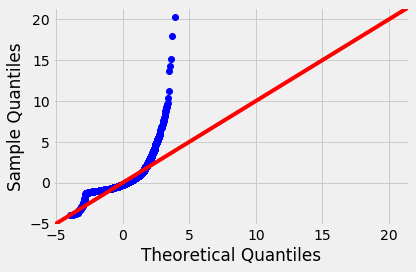

Regression Check~view
-----------------------


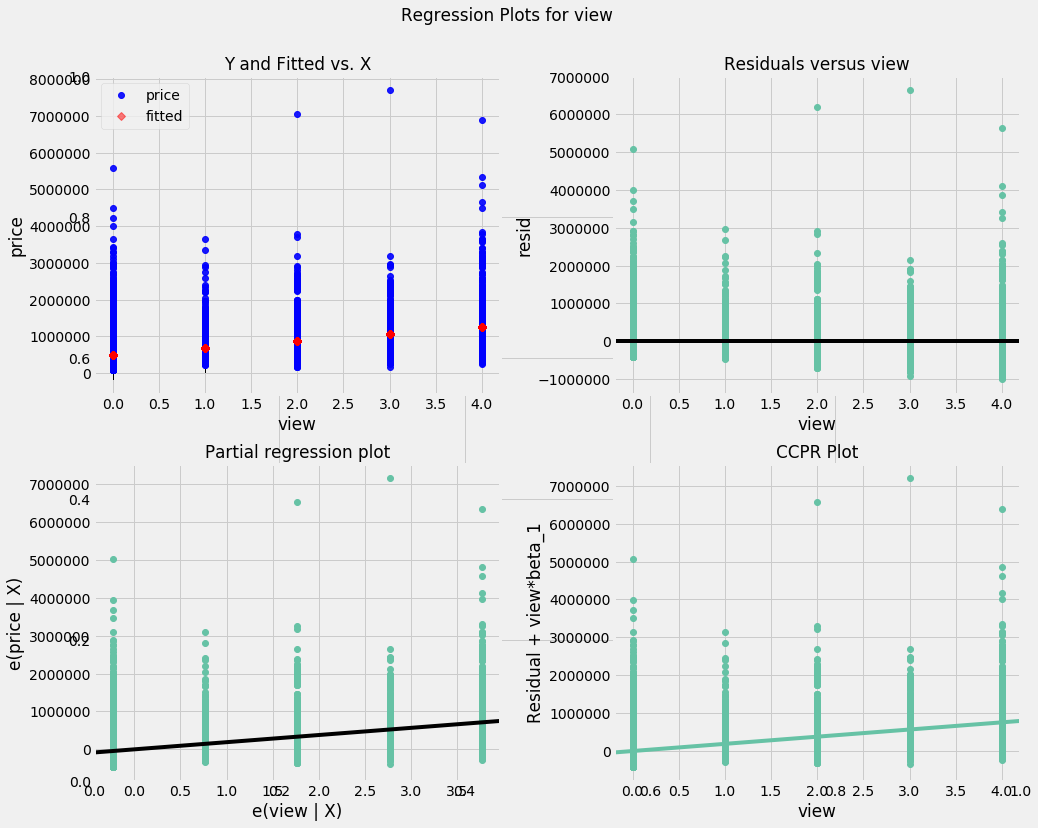

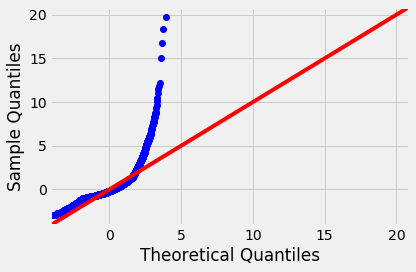

Regression Check~condition
-----------------------


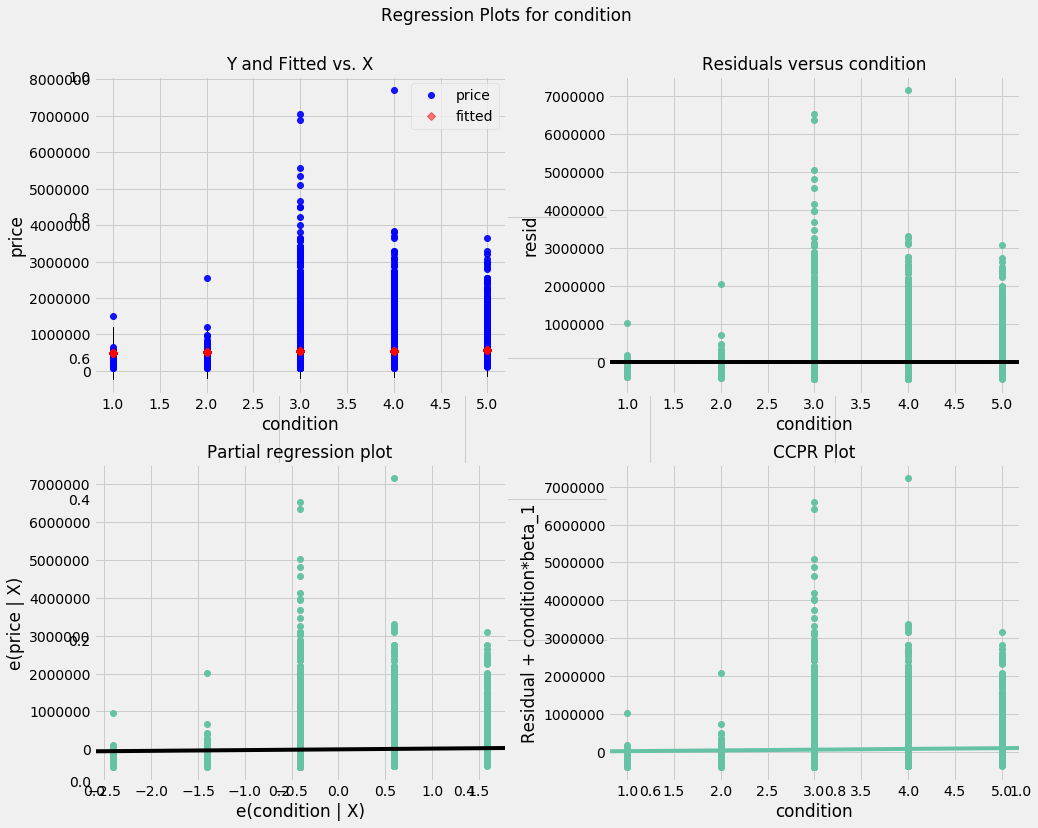

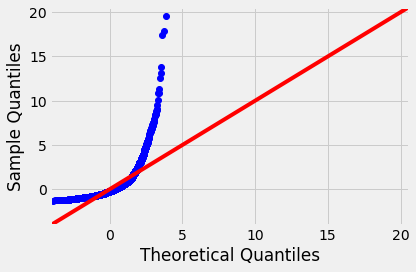

Regression Check~grade
-----------------------


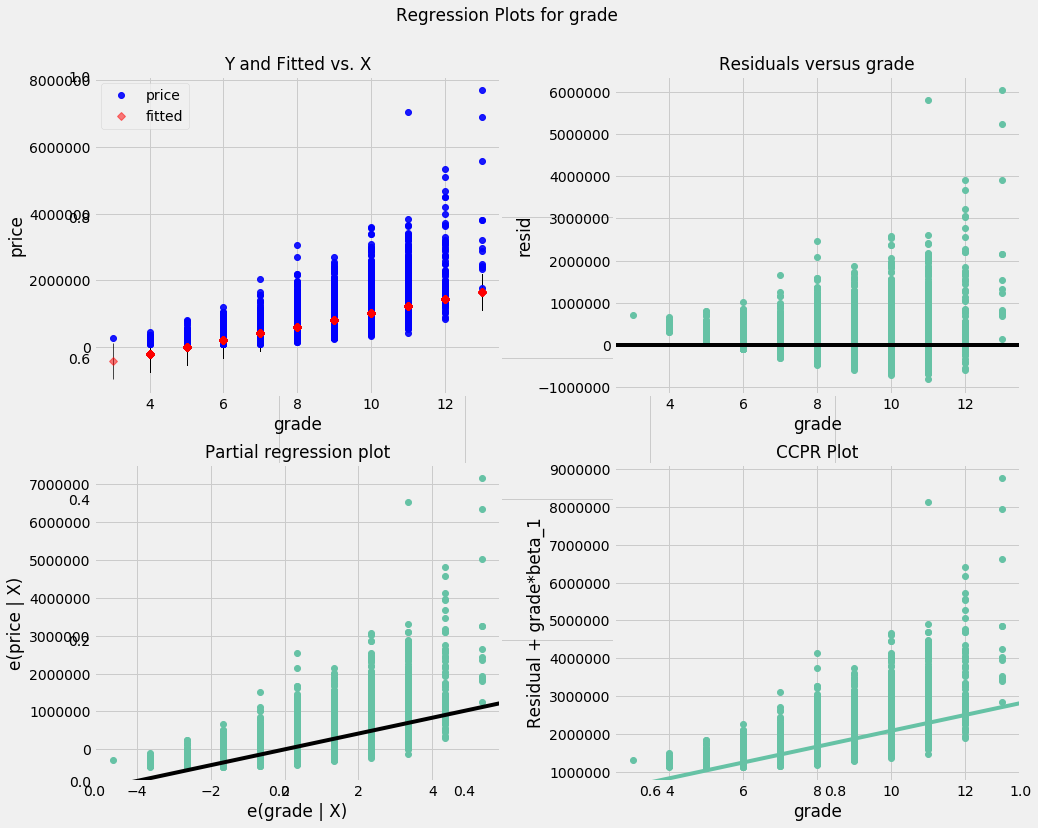

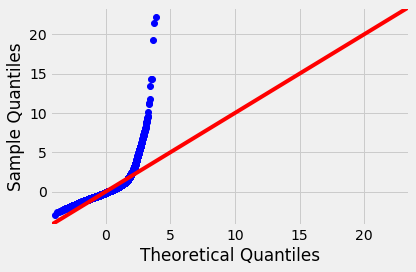

Regression Check~sqft_above
-----------------------


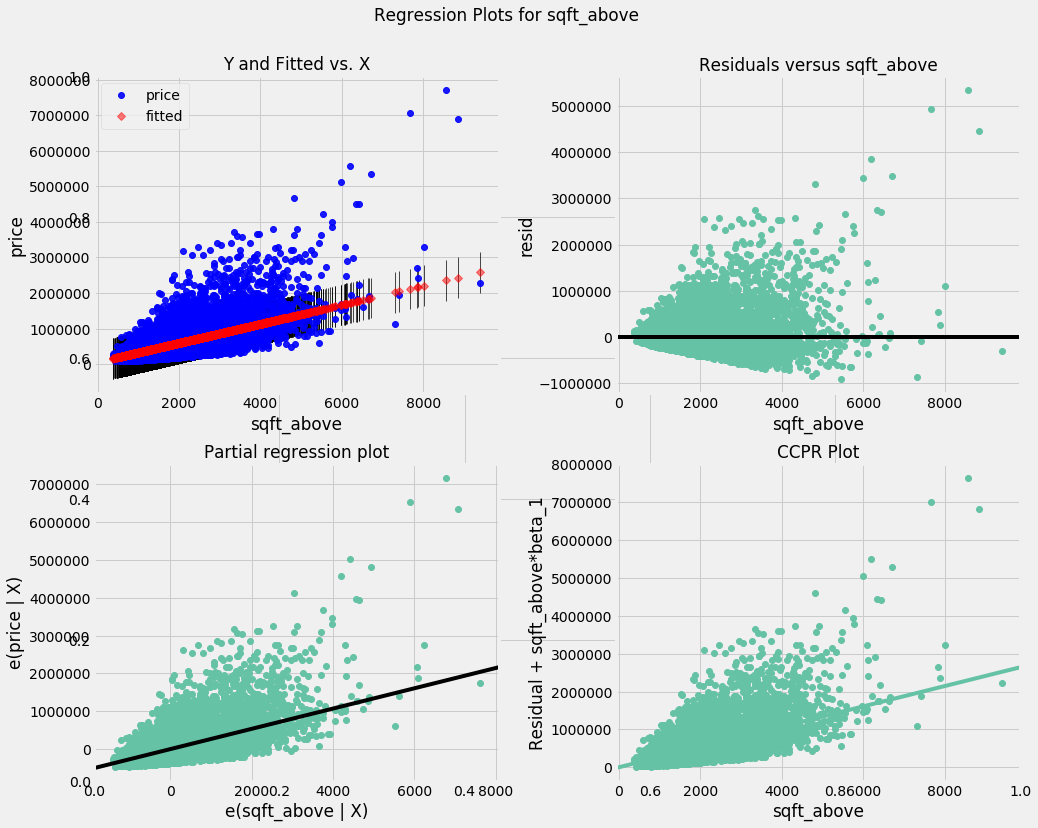

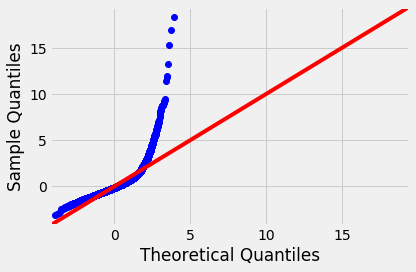

Regression Check~sqft_basement
-----------------------


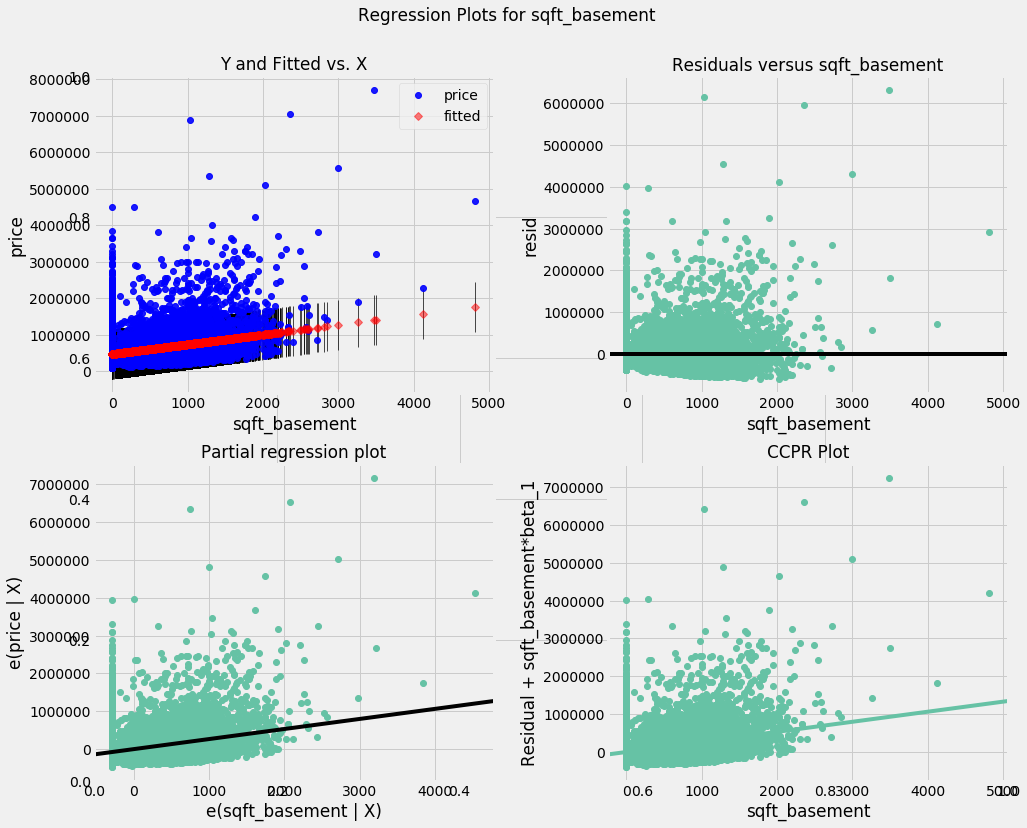

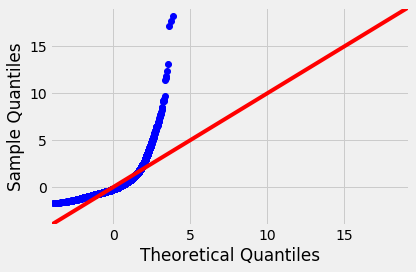

Regression Check~yr_built
-----------------------


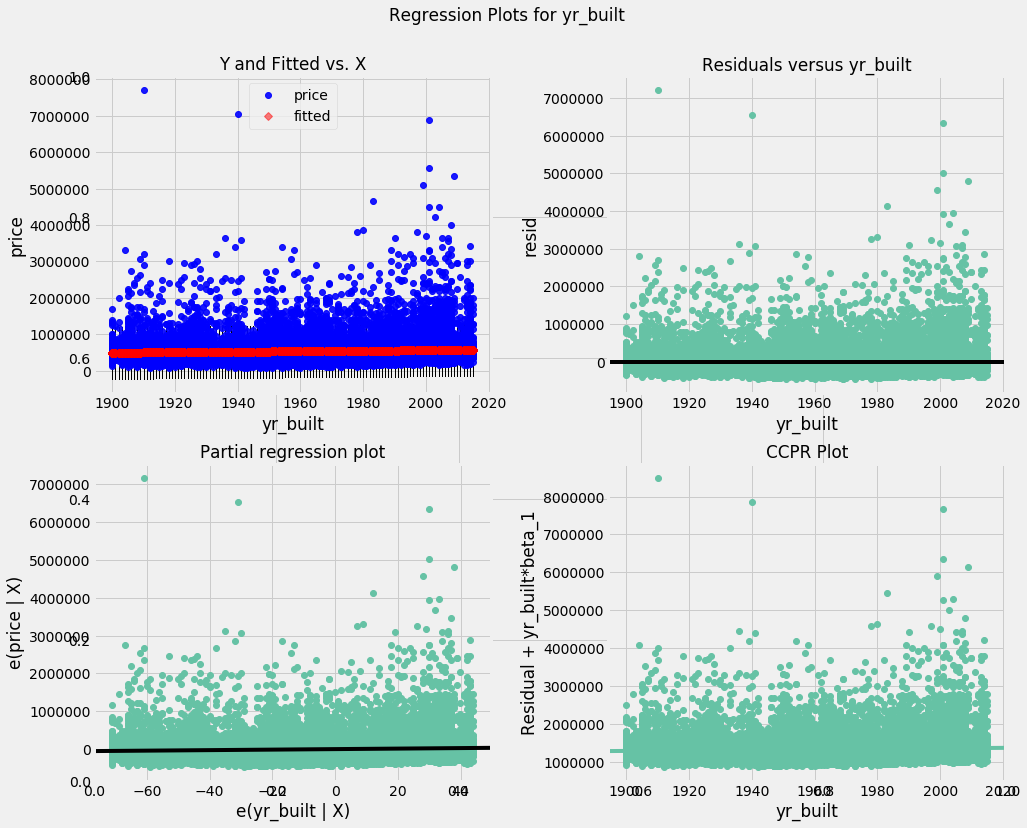

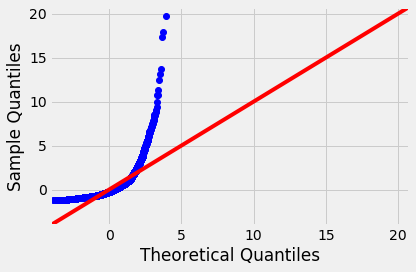

Regression Check~zipcode
-----------------------


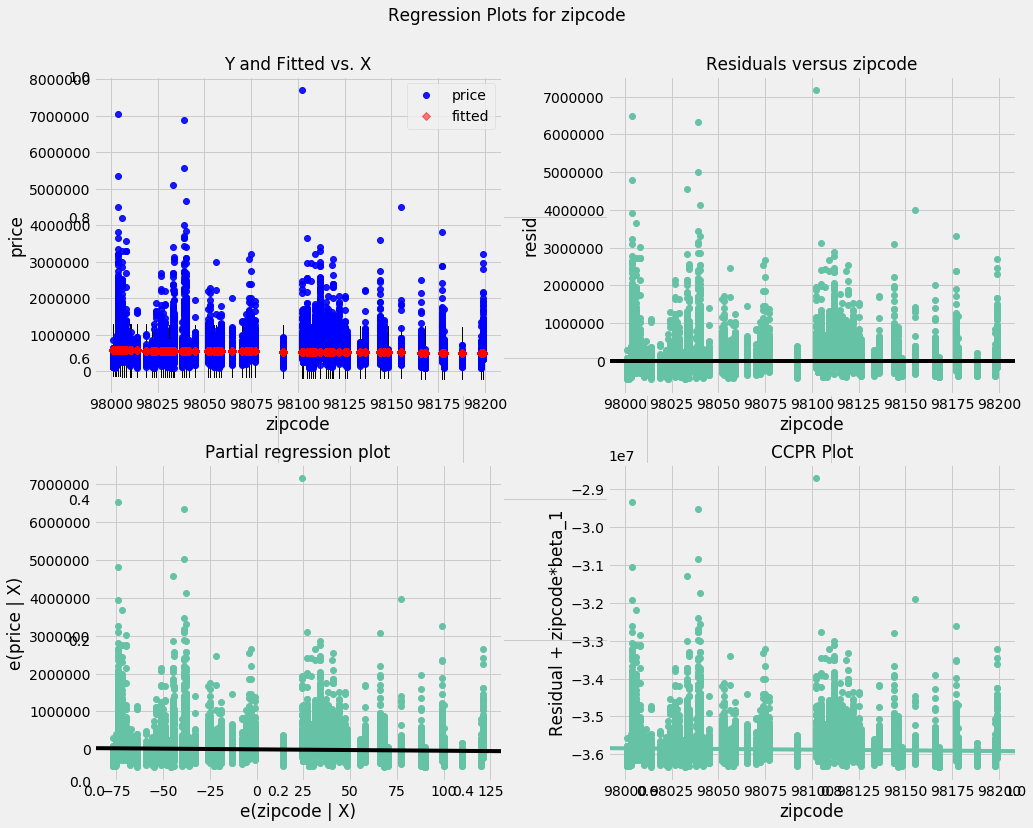

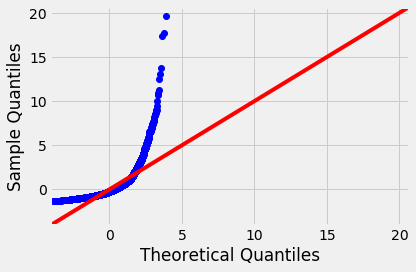

Regression Check~lat
-----------------------


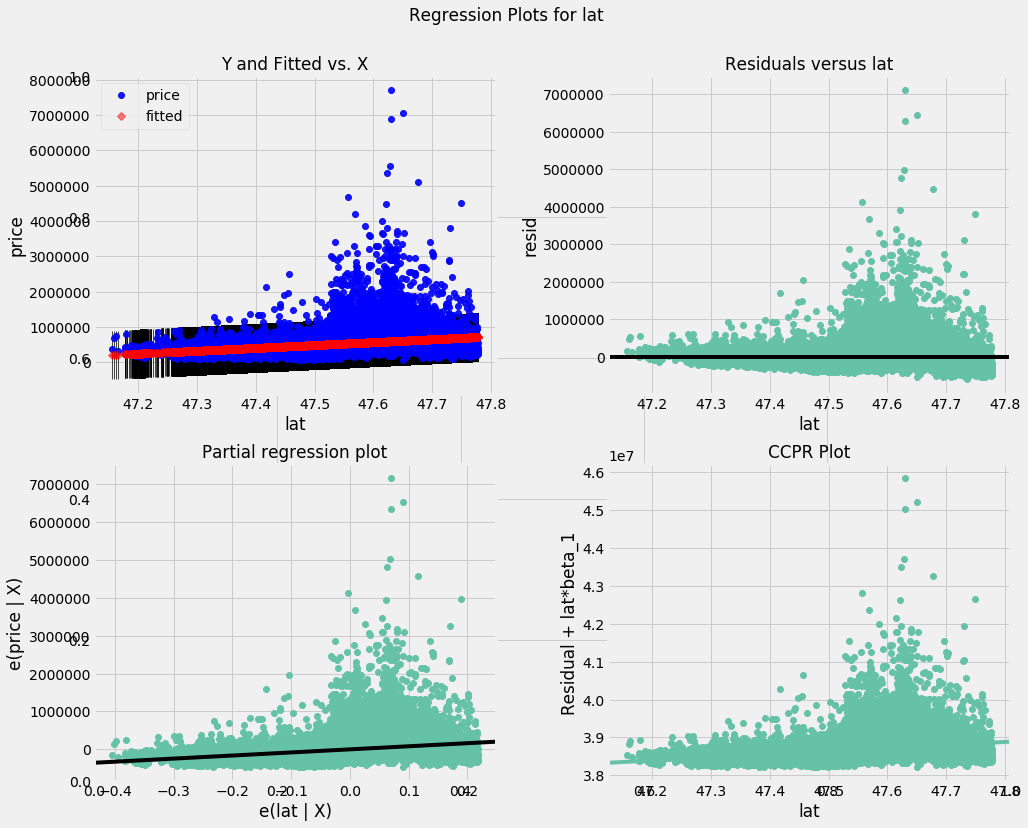

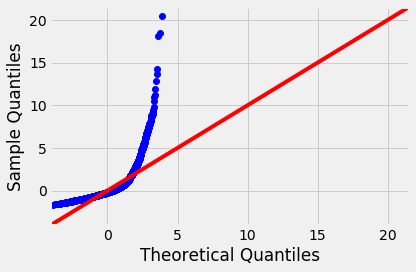

Regression Check~long
-----------------------


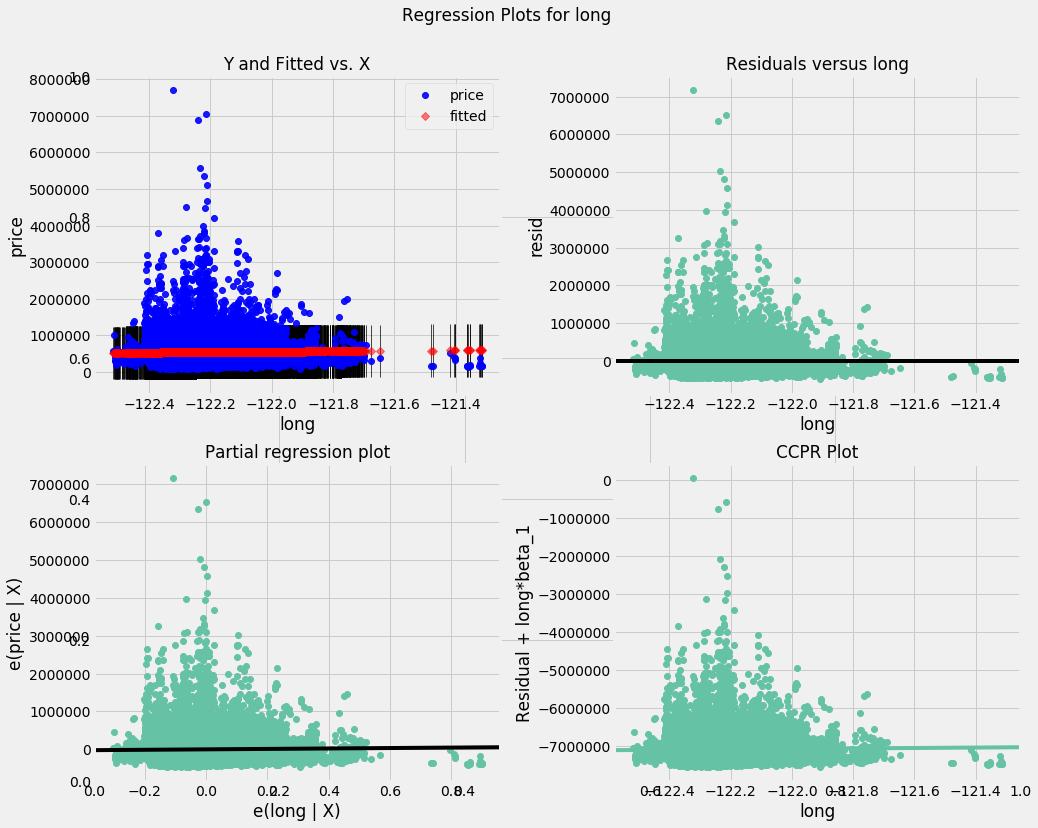

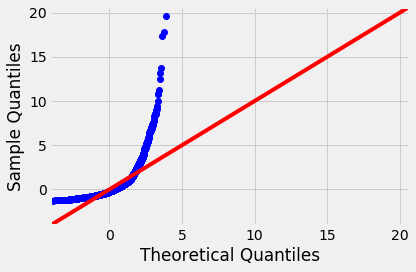

Regression Check~sqft_living15
-----------------------


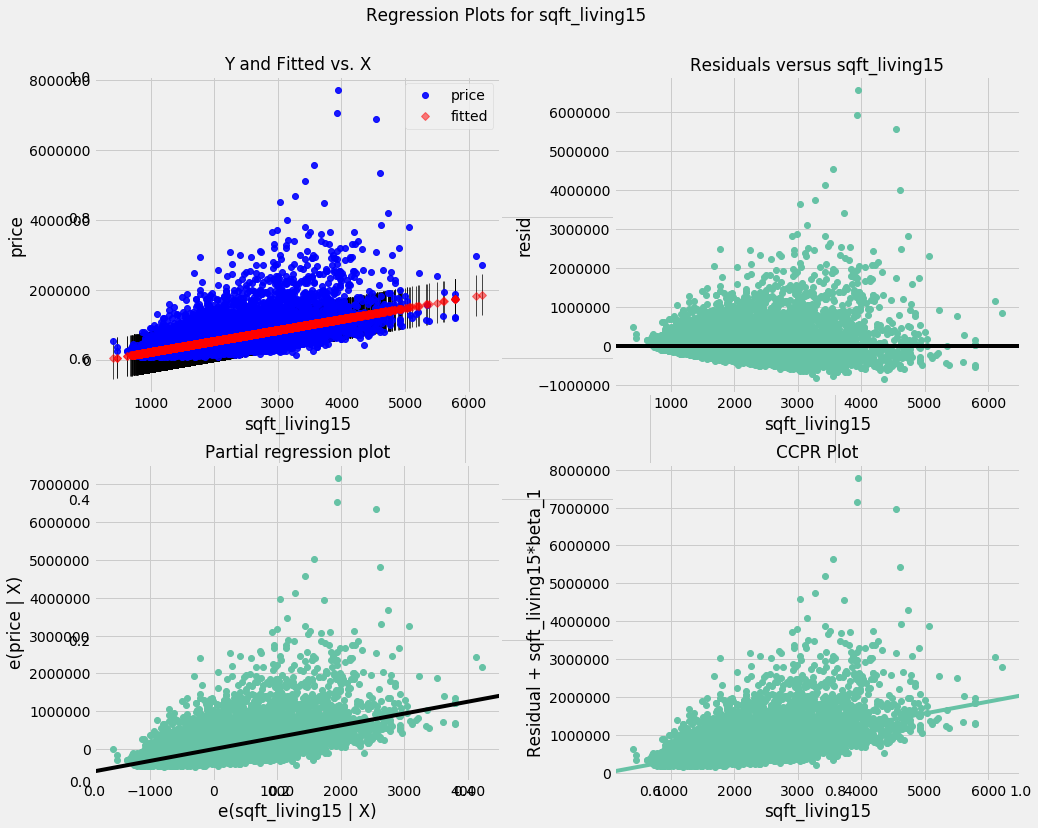

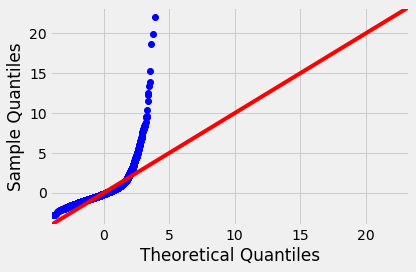

Regression Check~sqft_lot15
-----------------------


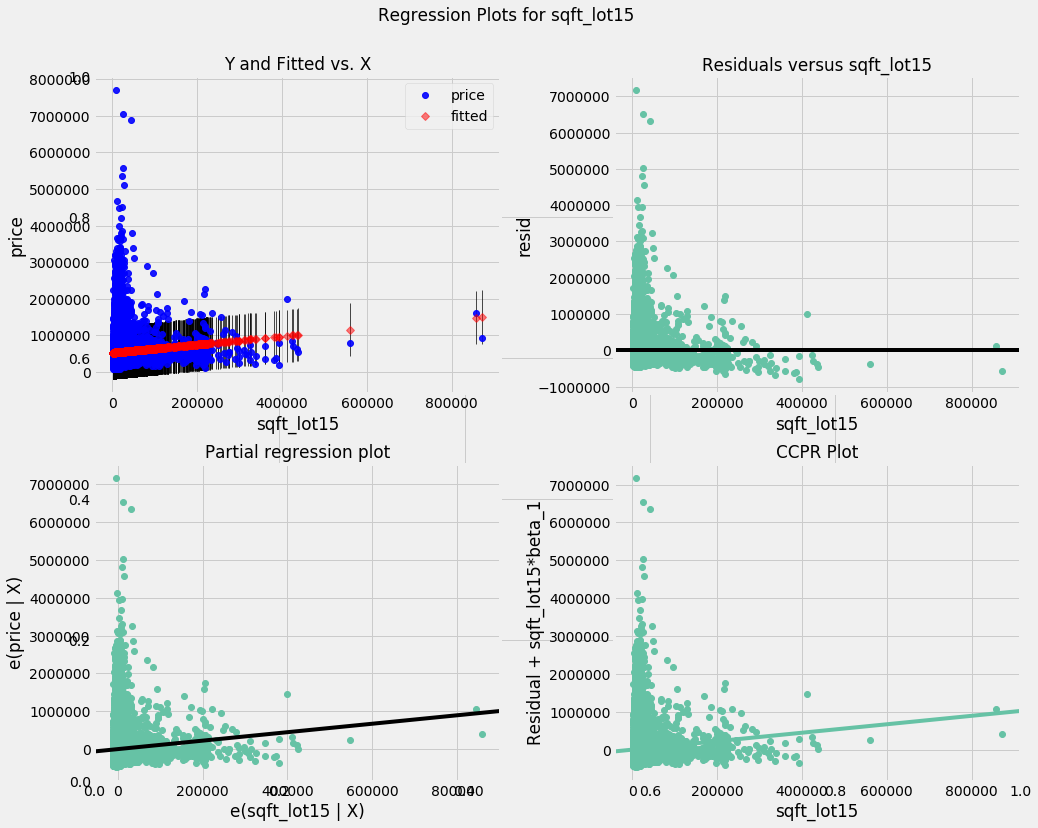

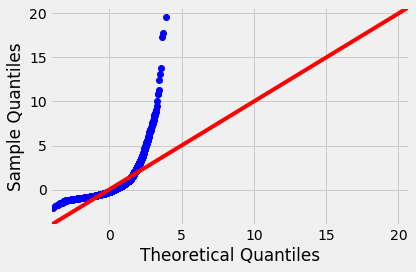

In [80]:
#Simple regression and check for normality & heteroskedasticity
normresults1 = checknormhet(df_clean, columns, 'price')

In [81]:
#Review results from the regessions and the qqplots
pd.DataFrame(normresults1, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])

ind_var  r_squared     intercept         slope       p-value  \
0        bedrooms   0.094889  1.295530e+05  1.217121e+05  0.000000e+00   
1       bathrooms   0.275606  1.105749e+04  2.500403e+05  0.000000e+00   
2     sqft_living   0.492176 -4.210759e+04  2.799166e+02  0.000000e+00   
3        sqft_lot   0.008158  5.280394e+05  7.989536e-01  3.029063e-40   
4          floors   0.066039  2.797186e+05  1.742626e+05  0.000000e+00   
5      waterfront   0.067199  5.322836e+05  1.160222e+06  0.000000e+00   
6            view   0.156600  4.958508e+05  1.891786e+05  0.000000e+00   
7       condition   0.001237  4.726132e+05  1.979074e+04  2.439304e-07   
8           grade   0.446579 -1.057654e+06  2.086471e+05  0.000000e+00   
9      sqft_above   0.366826  6.103436e+04  2.678386e+02  0.000000e+00   
10  sqft_basement   0.101786  4.642670e+05  2.658165e+02  0.000000e+00   
11       yr_built   0.002938 -7.910944e+05  6.753873e+02  1.737297e-15   
12        zipcode   0.002857  3.640724e+07 -3.657004e+02  4.215475e-15   
13            lat   0.094769 -3.814718e+07  8.134382e+05  0.000000e+00   
14           long   0.000499  7.638539e+06  5.808210e+04  1.049169e-03   
15  sqft_living15   0.342512 -8.105179e+04  3.127030e+02  0.000000e+00   
16     sqft_lot15   0.006917  5.258537e+05  1.116955e+00  2.298050e-34   

    normality (JB)  
0     1.154552e+06  
1     8.577589e+05  
2     5.161414e+05  
3     1.100781e+06  
4     1.204780e+06  
5     9.051499e+05  
6     1.003924e+06  
7     1.090782e+06  
8     1.969393e+06  
9     6.853740e+05  
10    8.574325e+05  
11    1.096632e+06  
12    1.077635e+06  
13    1.448409e+06  
14    1.091387e+06  
15    1.851719e+06  
16    1.095917e+06

<font color='blue'>

##### Observations:  
* No feature appears to be a standout in terms of explaining 'price.' R2 values are low and most features do not appear to have normal distributions. p-values do appear significant.
* Based on the scatter plots and regression plots:
    * May need to remove outliers for: bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, long, sqft_lot15
    * Possible non-continuous distributions: floors, waterfront, view, condition, grade, yr_built, zipcode
    * Possible good predictors based on appearance of linear relationship: bathrooms, sqft_living, condition, grade, sqft_above, sqft_basement, lat, long, sqft_living15. 
    * Possible multicollinearity for all the 'sqft' variables - likely need to get rid of at least one of them.
* Based on qqplots:
    * None of the features appear to be normally distributed - will need transform/normalize them.
    * Outliers are apparant for most features.

##### Questions:
1. Are there outliers for the features, and what are the distributions of those features?
2. Which features are correlated? Are all 'sqft' features correlated as I suspect?
3. How should the possible non-continuous features be transformed? 
4. Given there are many possible features, what is the least number of features needed to predict the variability of price?
5. For features that impact price the most, by how much do they impact price relative to one another?
6. How important is zipcode?
</font>

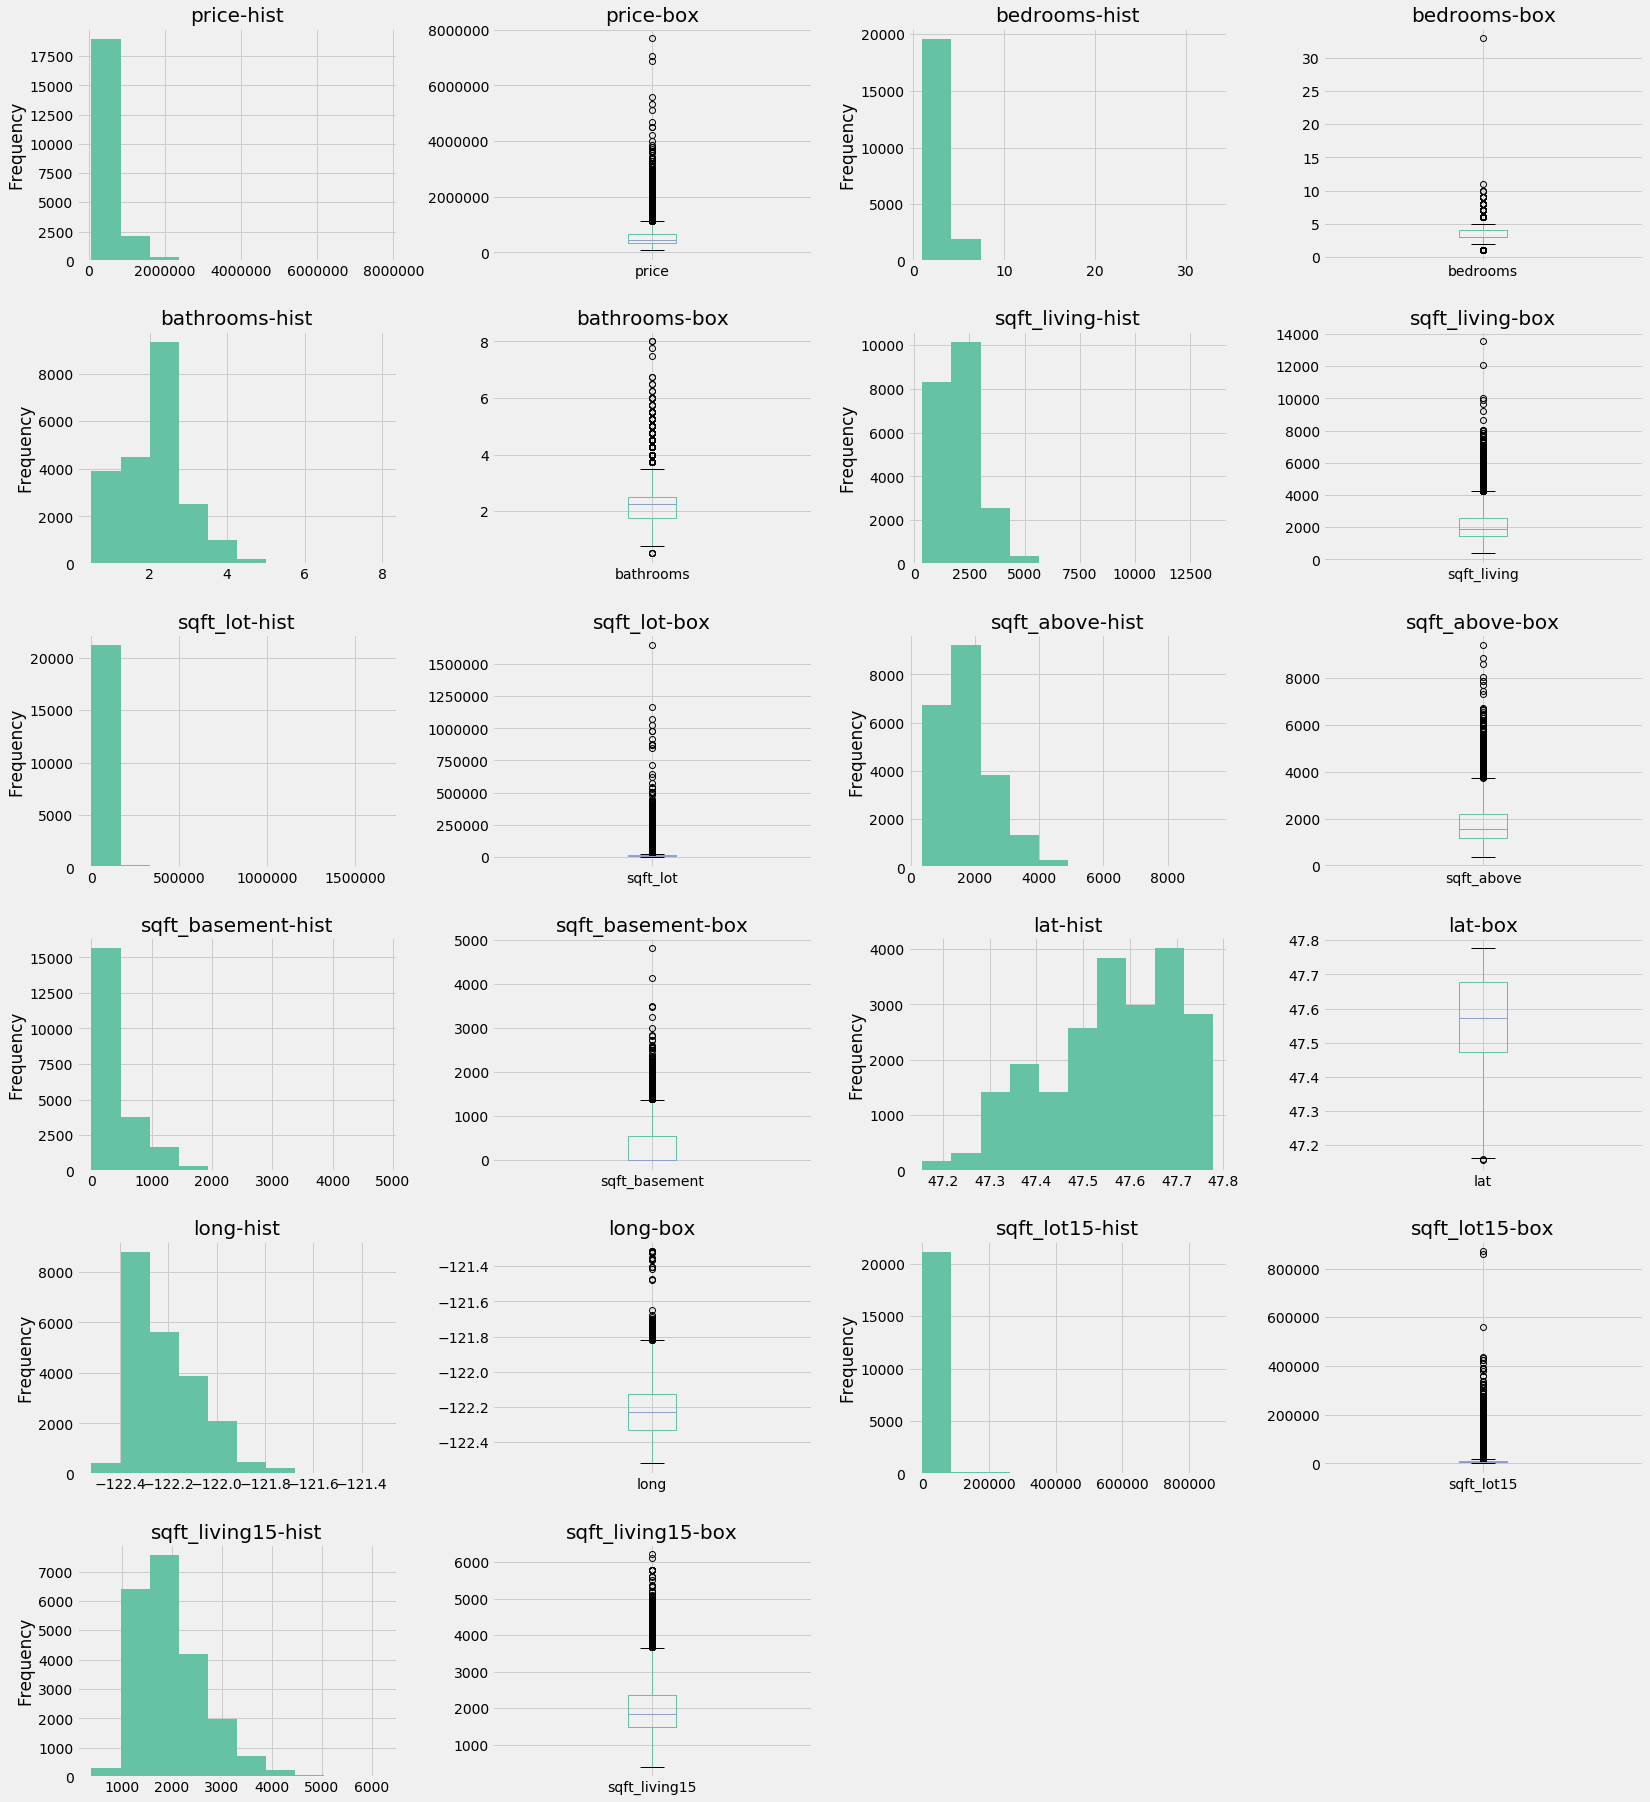

In [82]:
#Check the distributions of price and features with apparant outliers - use histograms and box plots
olcolumns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_lot15', 'sqft_living15']

plt.figure(figsize=(25,30))
distrgrid(df_clean, olcolumns);

<font color='blue'>

##### Observations:  
* In reviewing the outliers, it appears that the 'bedrooms' outlier of 33 bedrooms is likely a typo - it should probably be 3 based on the other variables for the id (bathrooms = 1.75, sqft_living = 1620, etc - not shown). I will simply delete it. The other outliers just look like they are some very large properties or properties on large lots. I will delete them as well.
* For 'long,' it looks like there are a cluster of properties that are located away from the bulk of the properties. I will deleted these as they skew the data.
* Based on the observed distributions and the regression check, I will define outliers as:
    * price > 2,000,000
    * bedrooms =1, > 5
    * sqft_lot > 250000 or sqft_lot15 > 350000 or sqft_living < 1000 or sqft_living > 4000
    * long < -122.4 or > -122
    * lat < 47.3
</font>

In [83]:
#Check the correlation between features - using 75% as correlation threshhold
corrdf = abs(df_clean.corr())
corrdf[(corrdf.iloc[:,:] >= 0.75) & (corrdf.iloc[:,:] < 1)].dropna(how='all').dropna(how='all', axis=1)

bathrooms  sqft_living     grade  sqft_above  sqft_living15
bathrooms            NaN     0.755246       NaN         NaN            NaN
sqft_living     0.755246          NaN  0.762392    0.876544       0.756177
grade                NaN     0.762392       NaN    0.756003            NaN
sqft_above           NaN     0.876544  0.756003         NaN            NaN
sqft_living15        NaN     0.756177       NaN         NaN            NaN

<font color='blue'>

#### Observations:
* As expected, several of the sqft features are correlated - correlated with 'Sqft_living.' I will keep 'sqft_living.'
* 'Grade' is correlated with 'sqft_above,' so I will delete 'grade.'
</font>

In [84]:
##### Delete correlated features and defined outliers. Also delete 'id' and 'date' given they will not be used in the model.
df_clean_dropped = df_clean.copy()
df_clean_dropped.drop(['bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'id', 'date'], axis=1, inplace=True)

#Remove defined outliers
outlierdf = df_clean_dropped.query('price > 2000000 or bedrooms > 5 or bedrooms == 1 or sqft_living > 4000 or sqft_living < 1000 or sqft_lot > 250000 or sqft_lot15 > 350000 or long < -122.4 or long > -122 or lat < 47.3')
df_clean_dropped = df_clean_dropped.drop(outlierdf.index).reset_index(drop=True)
df_clean_dropped.count()
df_clean_dropped.head(5)

price            16693
bedrooms         16693
sqft_living      16693
sqft_lot         16693
floors           16693
waterfront       16693
view             16693
condition        16693
sqft_basement    16693
yr_built         16693
zipcode          16693
lat              16693
long             16693
sqft_lot15       16693
dtype: int64

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  221900.0         3         1180      5650     1.0         0.0   0.0   
1  538000.0         3         2570      7242     2.0         0.0   0.0   
2  604000.0         4         1960      5000     1.0         0.0   0.0   
3  510000.0         3         1680      8080     1.0         0.0   0.0   
4  257500.0         3         1715      6819     2.0         0.0   0.0   

   condition  sqft_basement  yr_built  zipcode      lat     long  sqft_lot15  
0          3            0.0      1955    98178  47.5112 -122.257        5650  
1          3          400.0      1951    98125  47.7210 -122.319        7639  
2          5          910.0      1965    98136  47.5208 -122.393        5000  
3          3            0.0      1987    98074  47.6168 -122.045        7503  
4          3            0.0      1995    98003  47.3097 -122.327        6819

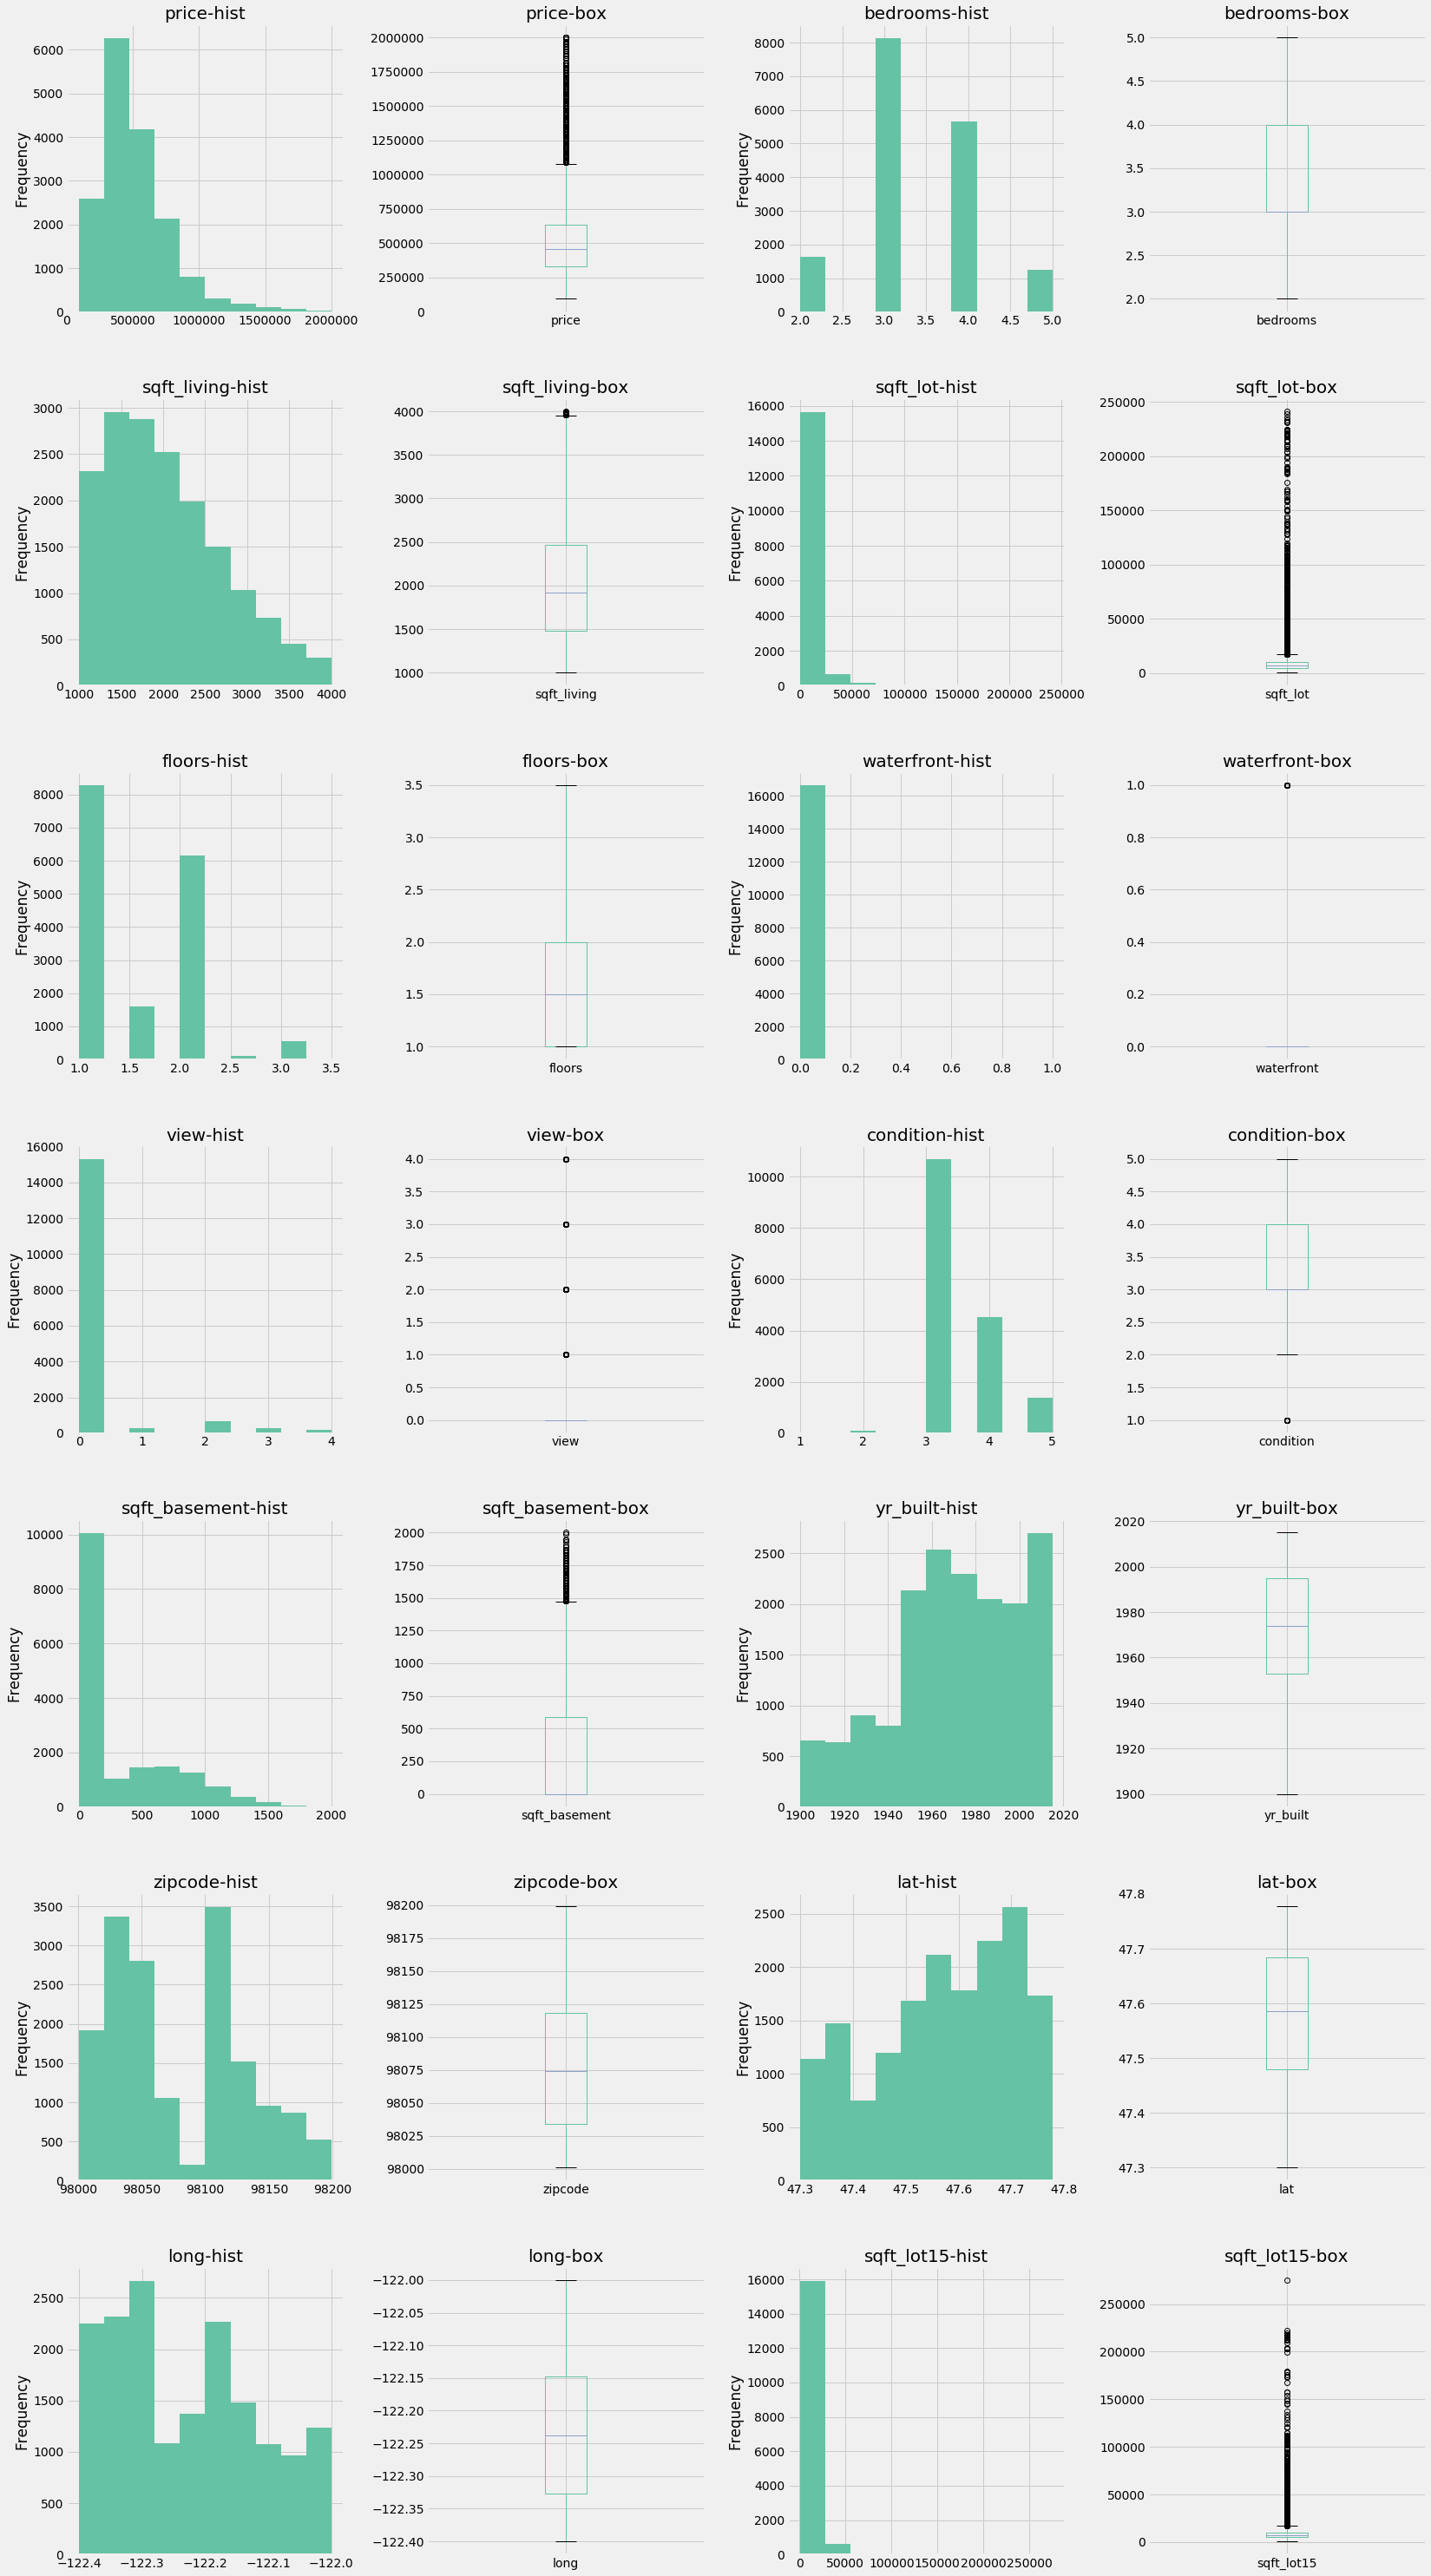

In [85]:
#Take a look at price and feature distributions from the updated dataframe
columns = df_clean_dropped.columns.tolist()

plt.figure(figsize=(25,50))
distrgrid(df_clean_dropped, columns);

<font color='blue'>

#### Observations:
* 'sqft basement' has so many 0 values and sqft features are correlated, so it makes sense to change the feature to a binomial - either there is a basement or not.
* 'view' and 'condition' are clearly categorical variables, so I will create dummies for them.
* 'bedrooms,' 'floors,' and 'zipcodes' can also be categorical variables.
* All other features look continuous, so I will log transform them - 'long' will need to be changed to a positive number.
* 'yr_built' could be used to create an 'age' variable - I tried this, but the distributions are not really different, so it doesn't make sense to do so.
</font>

In [86]:
##Perform data transformations
df_final =  df_clean_dropped.copy()

#Change 'sqft_basement' to a binomial and make 'long' positive
df_final['basement'] = df_final['sqft_basement'].apply(lambda x: 1 if x > 0 else 0 )
df_final.drop(['sqft_basement'], axis=1, inplace=True)
df_final['long'] = df_final['long'].apply(lambda x: x * -1 )

#Create dummies for categorical features
categoricals = ['bedrooms', 'floors', 'view', 'condition', 'zipcode']
df_final = pd.get_dummies(df_final, prefix=categoricals, columns=categoricals, drop_first=True)

#Log transform the continuous variables and normalize them
continuous = ['price', 'sqft_lot', 'sqft_living', 'yr_built', 'lat', 'long', 'sqft_lot15']
df_cont = df_final[continuous]
df_final.drop(continuous, axis=1, inplace=True)
log_names = [f'{col}_log' for col in df_cont.columns]
df_cont_log = np.log(df_cont)
df_cont_log.columns = log_names

#Normalize the continuous features - done with std
df_cont_log_norm = df_cont_log.apply(normalize)

#Put all together into one dataframe
df_final = pd.concat([df_cont_log_norm, df_final], axis=1)
df_final.head()

price_log  sqft_lot_log  sqft_living_log  yr_built_log   lat_log  long_log  \
0  -1.603513     -0.323256        -1.465940     -0.540037 -0.451902  0.239343   
1   0.315526     -0.008926         0.871544     -0.679116  1.134391  0.790039   
2   0.566266     -0.478011         0.057855     -0.193582 -0.379164  1.446956   
3   0.199712      0.129719        -0.405054      0.562455  0.347411 -1.645793   
4  -1.281100     -0.085133        -0.343135      0.835303 -1.982047  0.861076   

   sqft_lot15_log  waterfront  basement  bedrooms_3  ...  zipcode_98146  \
0       -0.330969         0.0         0           1  ...              0   
1        0.093323         0.0         1           1  ...              0   
2       -0.502900         0.0         1           0  ...              0   
3        0.068052         0.0         0           1  ...              0   
4       -0.066419         0.0         0           1  ...              0   

   zipcode_98148  zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
0              1              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 87 columns]

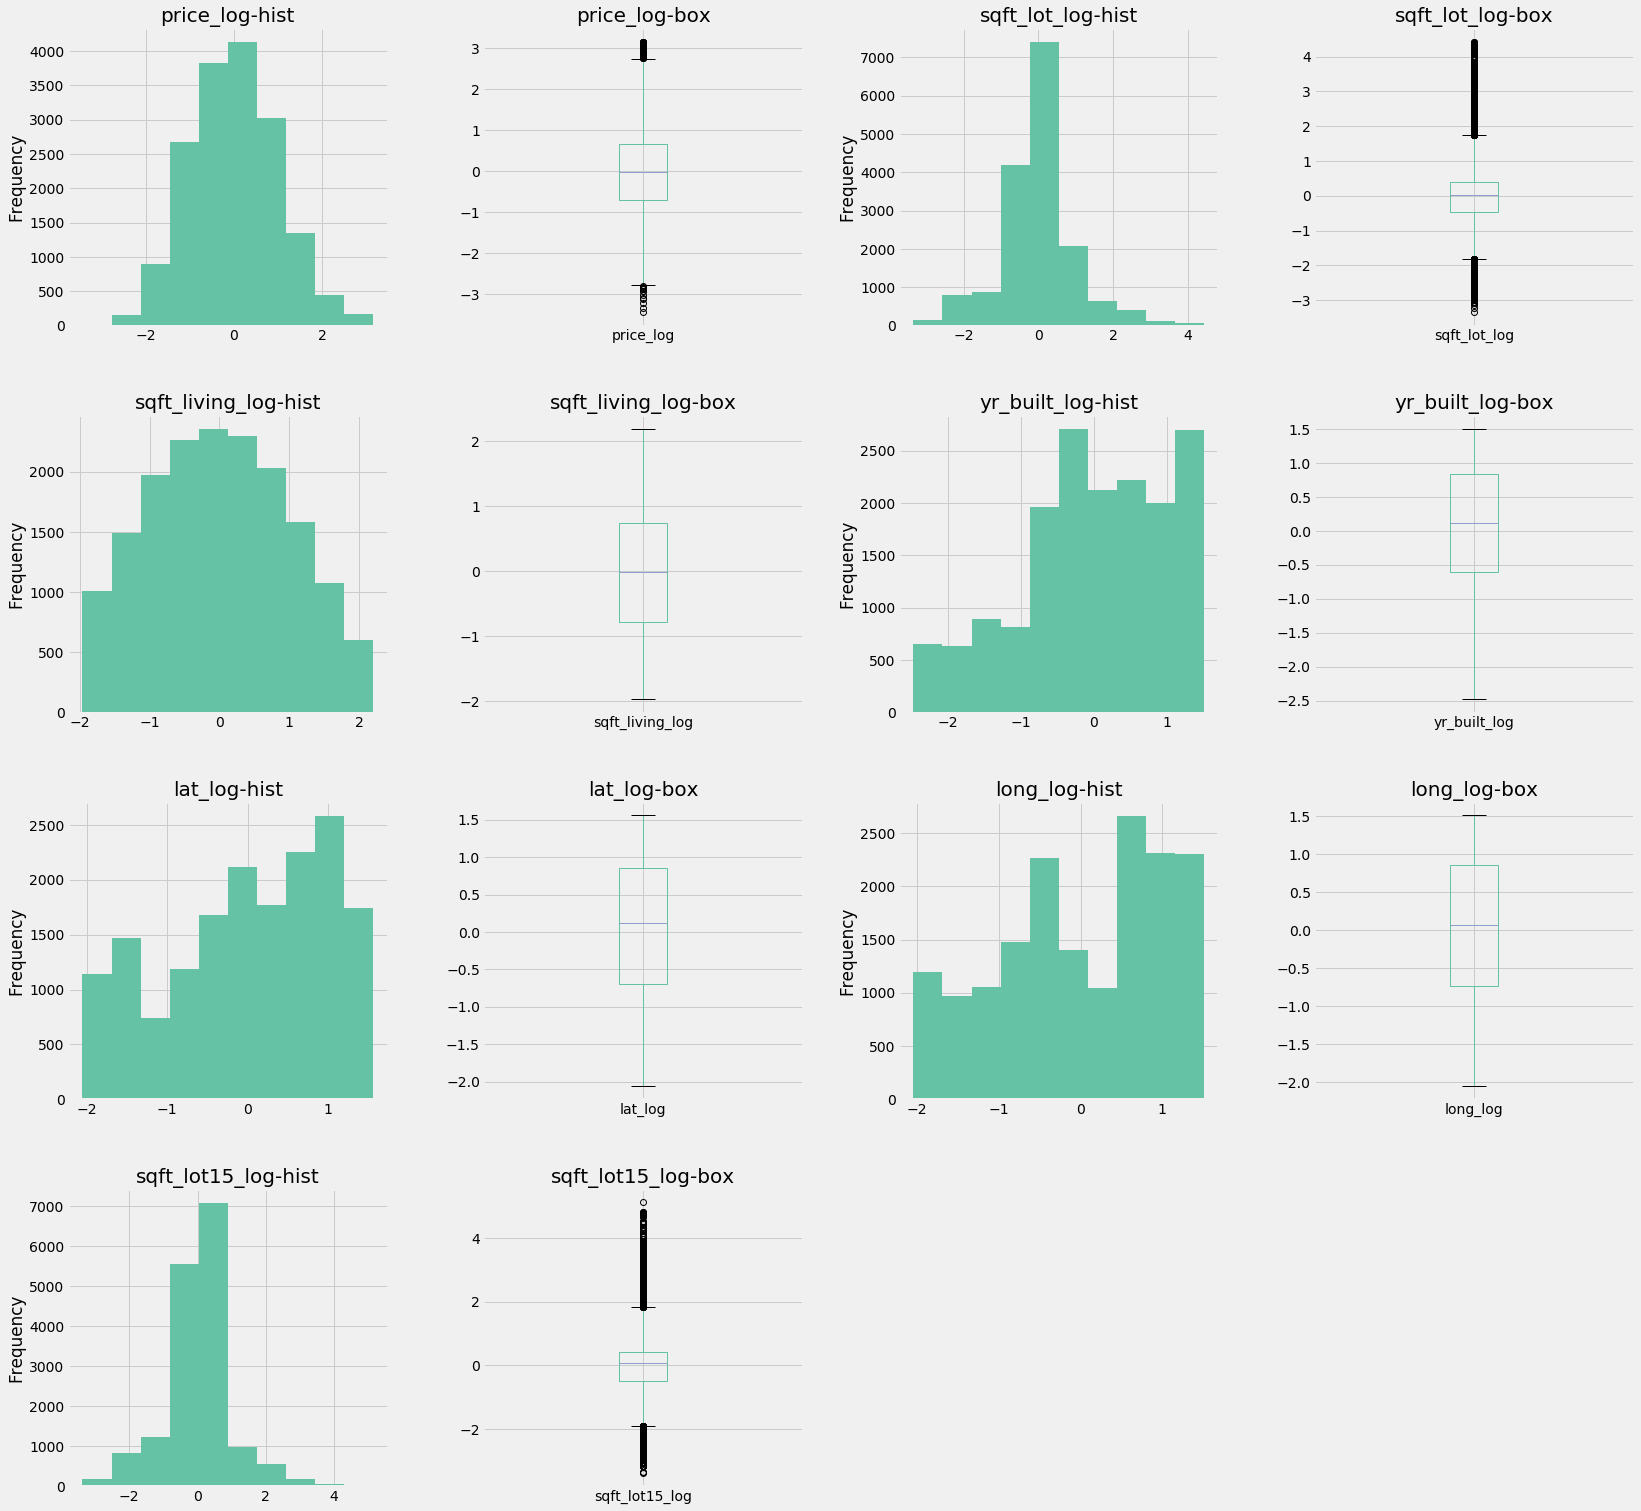

In [87]:
#Check plots of the log features in the final dataframe
plt.figure(figsize=(25,25))
distrgrid(df_final, log_names);


<font color='blue'>
    
#### Observations:
* Many of the distributions are improved, however distributions for these features did not change in a meaningful way: 'lat_log', 'long_log', 'yr_built_log.' I think that theoretically these features could either be defined as continuous or categorical, but I will not treat them as either. I will change these features back to their raw data and scale them.
</font>

In [88]:
df_final.drop(['lat_log', 'long_log', 'yr_built_log' ], axis=1, inplace=True)
lat = df_clean_dropped['lat']
long = df_clean_dropped['long']
yb = df_clean_dropped['yr_built']
df_final['lat'] = (lat - lat.min()) / (lat.max() - lat.min())
df_final['long'] = (long - long.min()) / (long.max() - long.min())
df_final['yr_built'] = (yb - yb.min()) / (yb.max() - yb.min())
df_final.head()

price_log  sqft_lot_log  sqft_living_log  sqft_lot15_log  waterfront  \
0  -1.603513     -0.323256        -1.465940       -0.330969         0.0   
1   0.315526     -0.008926         0.871544        0.093323         0.0   
2   0.566266     -0.478011         0.057855       -0.502900         0.0   
3   0.199712      0.129719        -0.405054        0.068052         0.0   
4  -1.281100     -0.085133        -0.343135       -0.066419         0.0   

   basement  bedrooms_3  bedrooms_4  bedrooms_5  floors_1.5  ...  \
0         0           1           0           0           0  ...   
1         1           1           0           0           0  ...   
2         1           0           1           0           0  ...   
3         0           1           0           0           0  ...   
4         0           1           0           0           0  ...   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   zipcode_98198  zipcode_98199       lat    long  yr_built  
0              0              0  0.442094  0.3575  0.478261  
1              0              0  0.881466  0.2025  0.443478  
2              0              0  0.462199  0.0175  0.565217  
3              0              0  0.663246  0.8875  0.756522  
4              0              0  0.020105  0.1825  0.826087  

[5 rows x 87 columns]

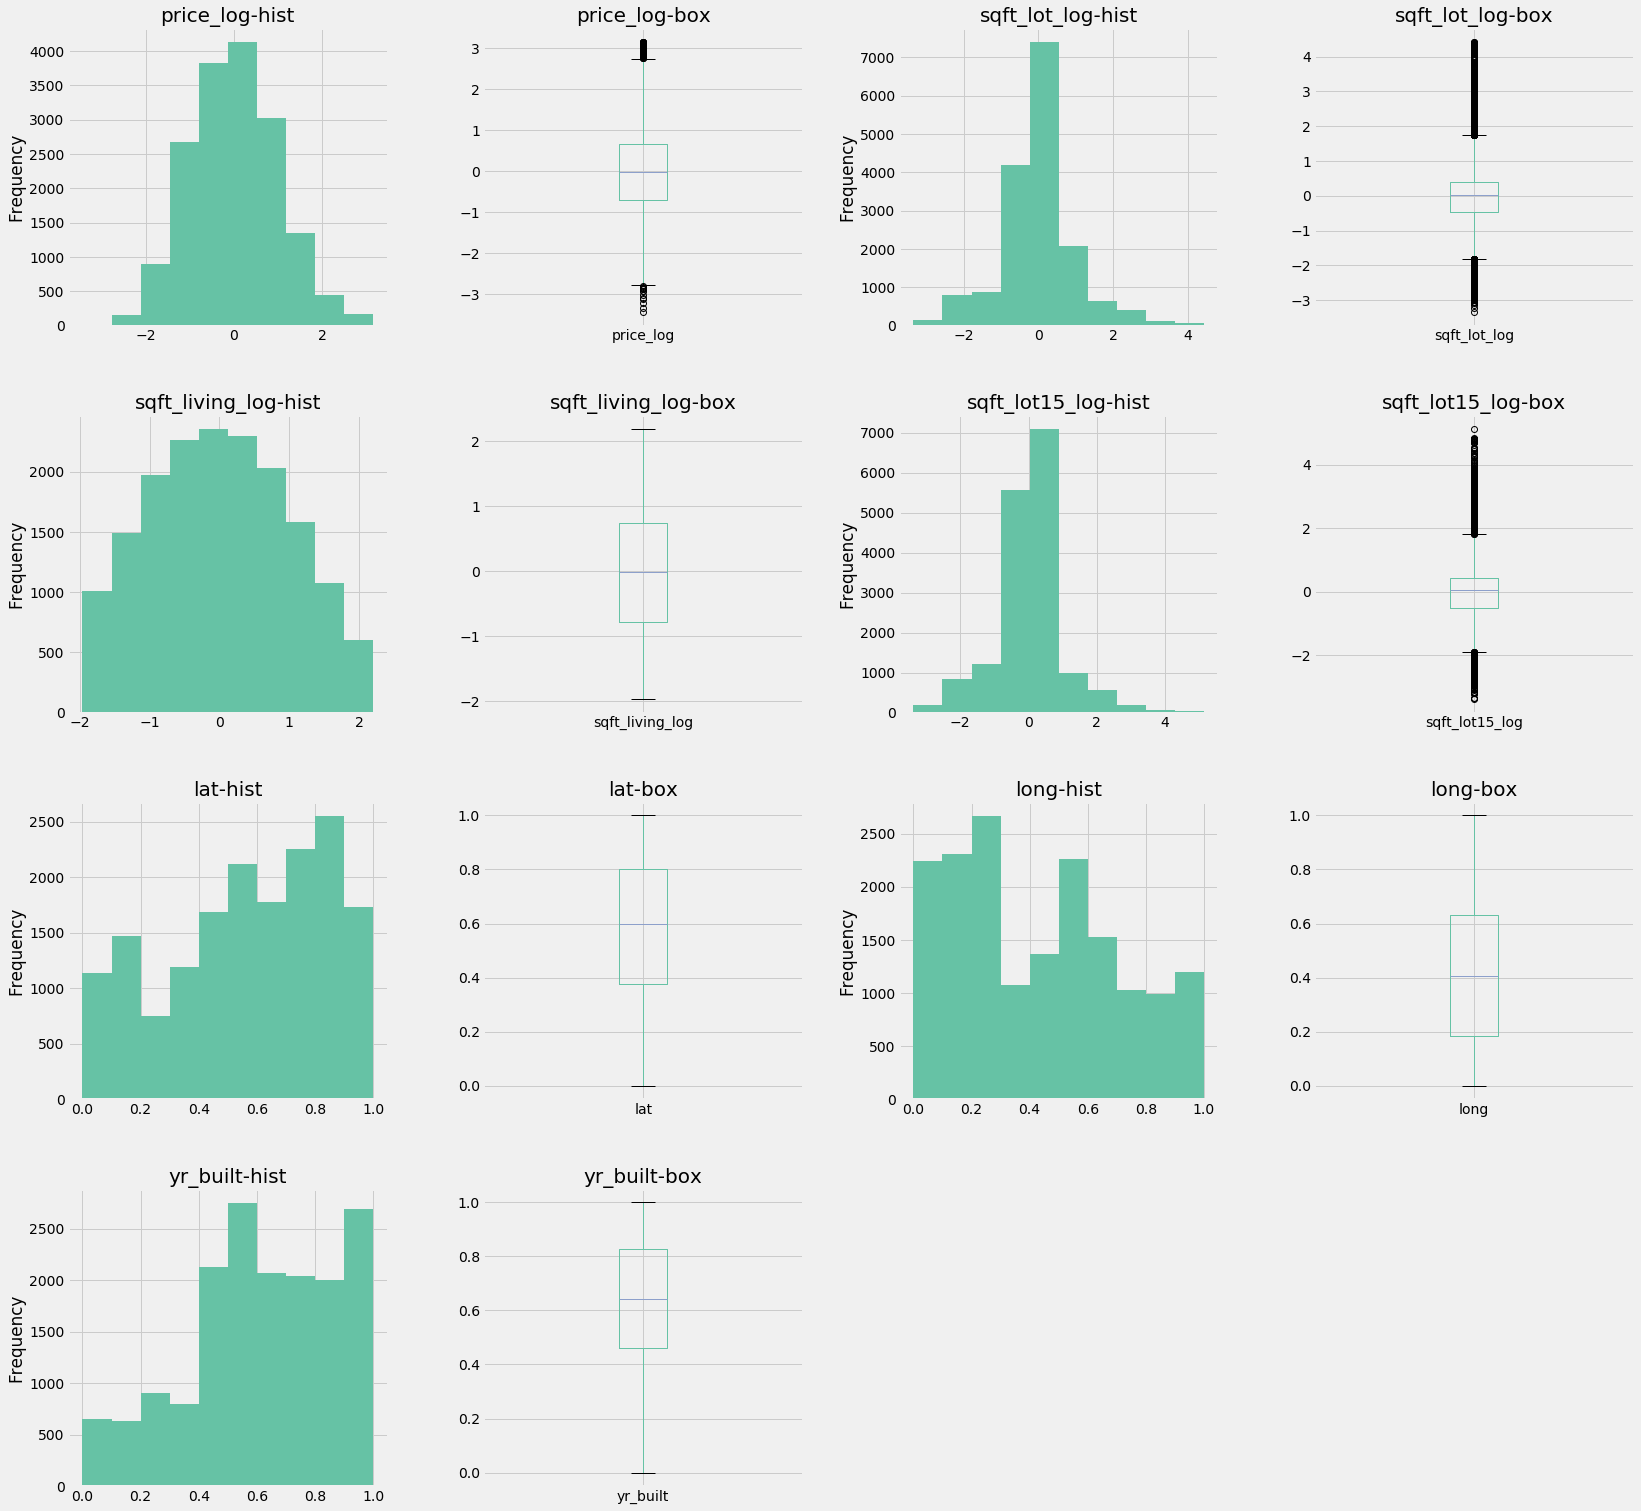

In [89]:
#Check plots of all continuous features
toremove = ['basement', 'waterfront']
for cat in categoricals:
    toremove += df_final.filter(like=cat, axis=1).columns.to_list()
contcols = [col for col in df_final.columns.to_list() if col not in toremove]
plt.figure(figsize=(25,25))
distrgrid(df_final, contcols);

Regression Check~sqft_lot_log
-----------------------


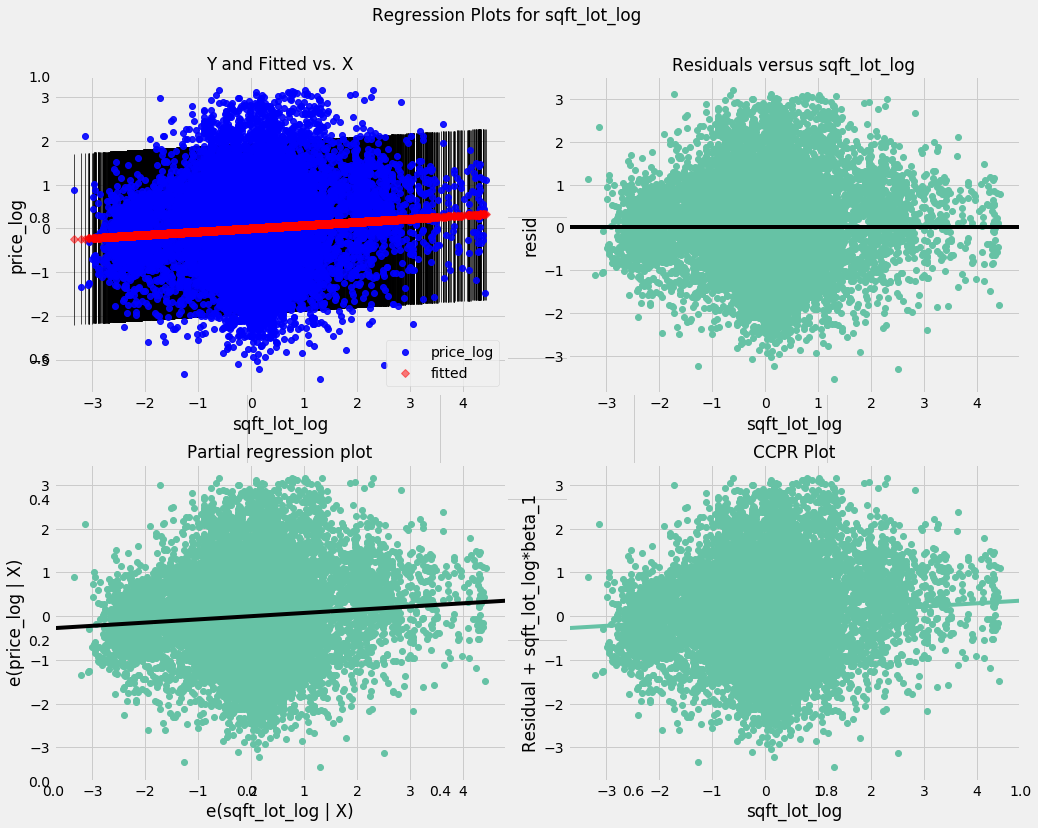

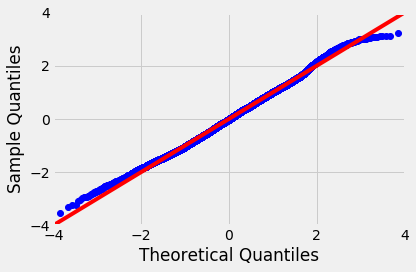

Regression Check~sqft_living_log
-----------------------


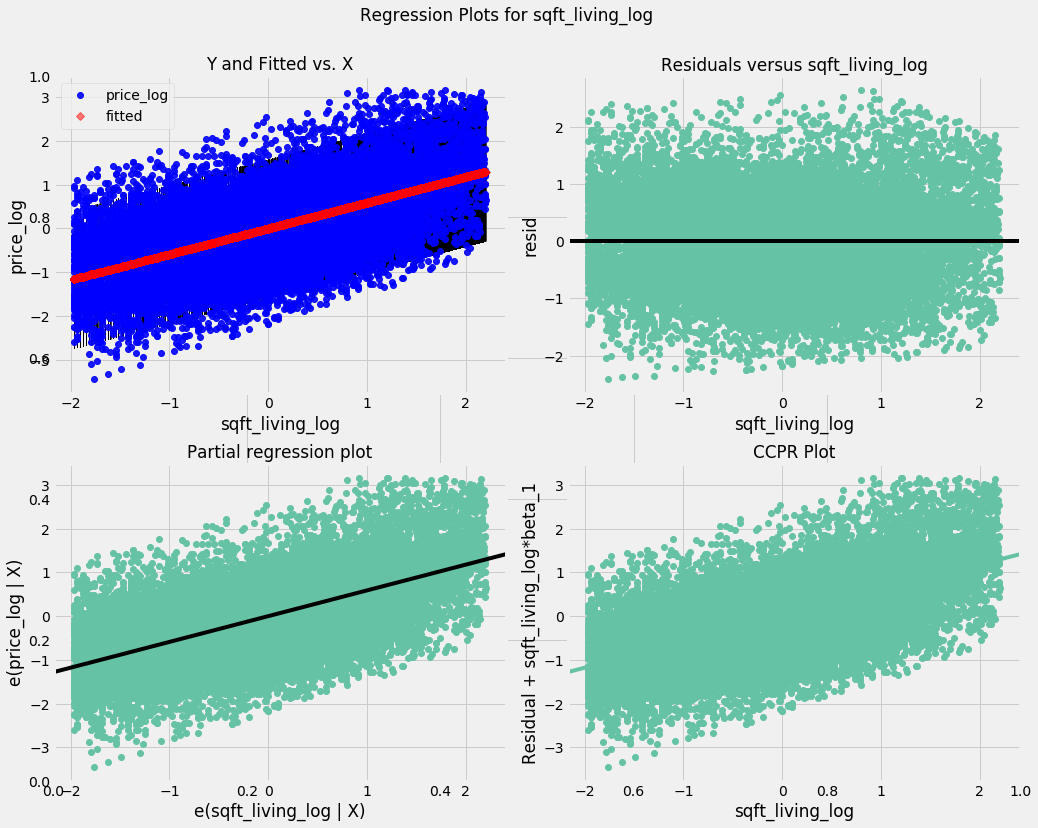

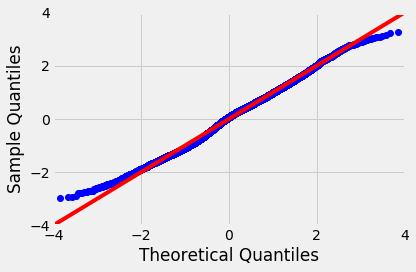

Regression Check~sqft_lot15_log
-----------------------


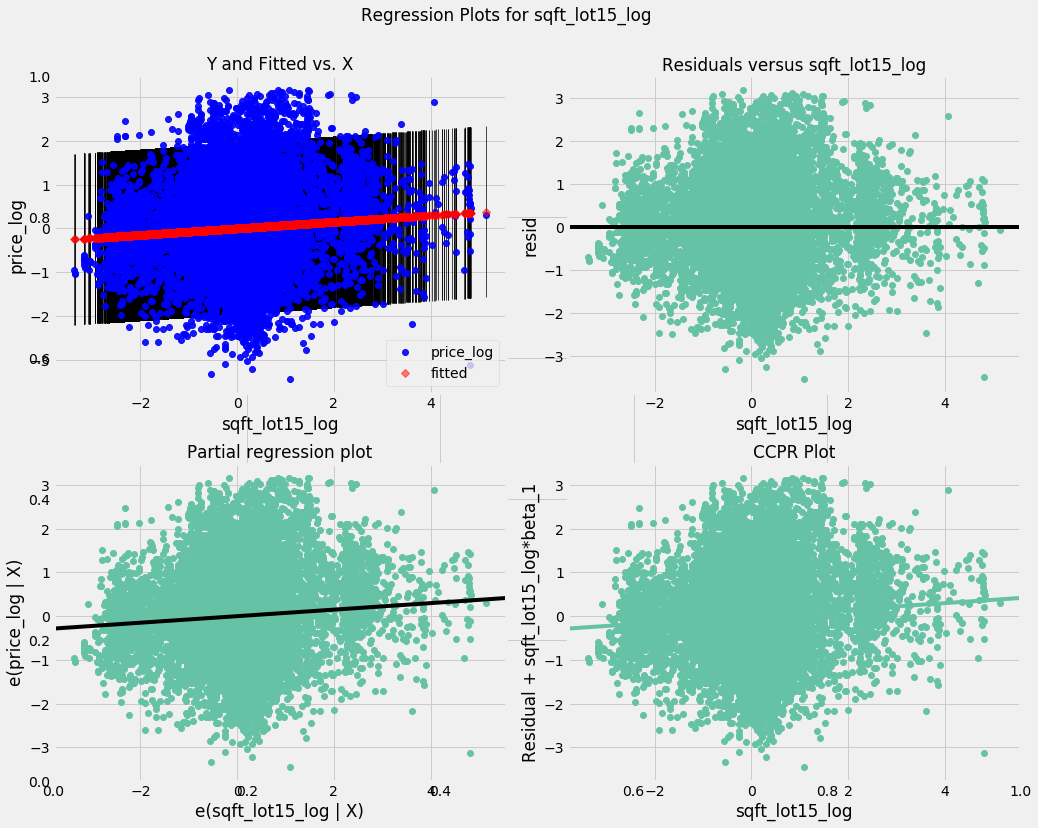

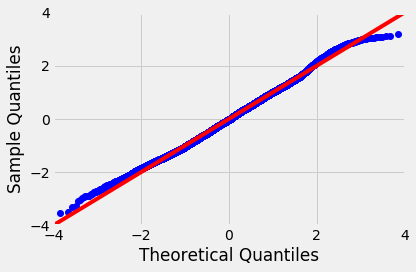

Regression Check~lat
-----------------------


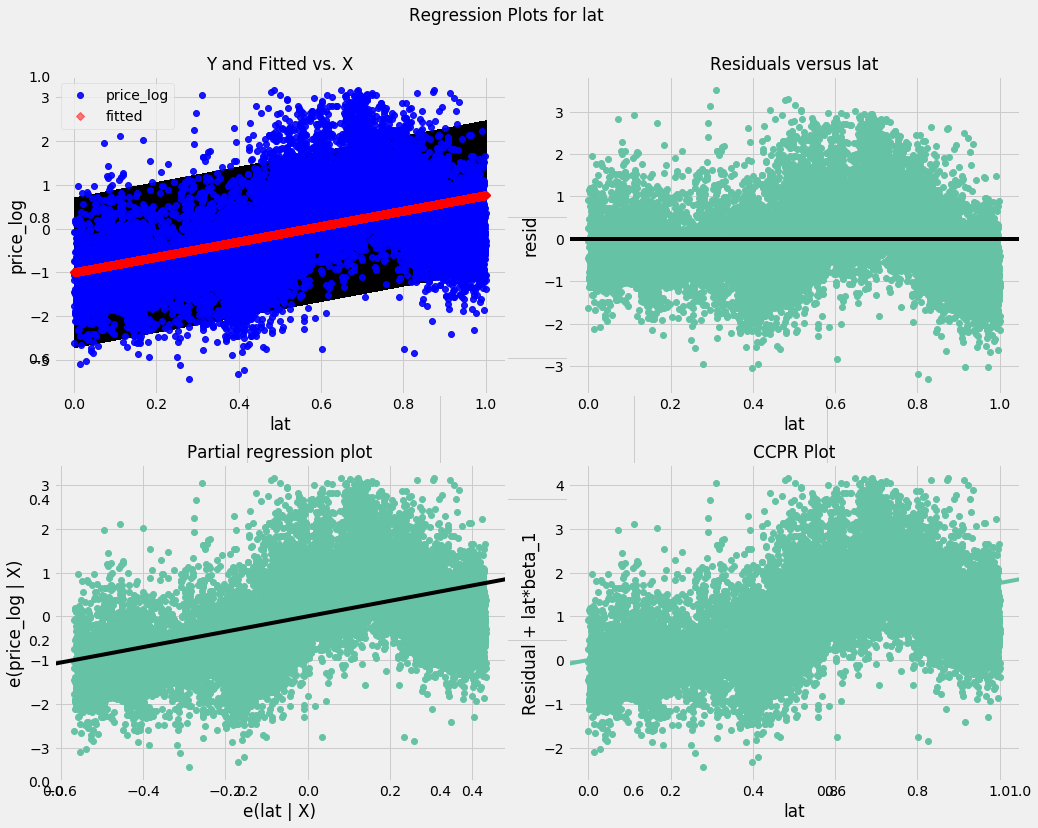

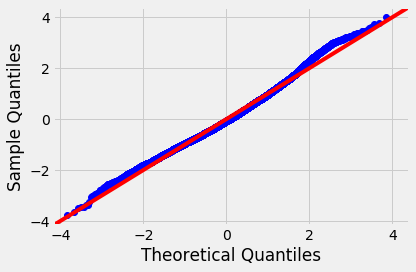

Regression Check~long
-----------------------


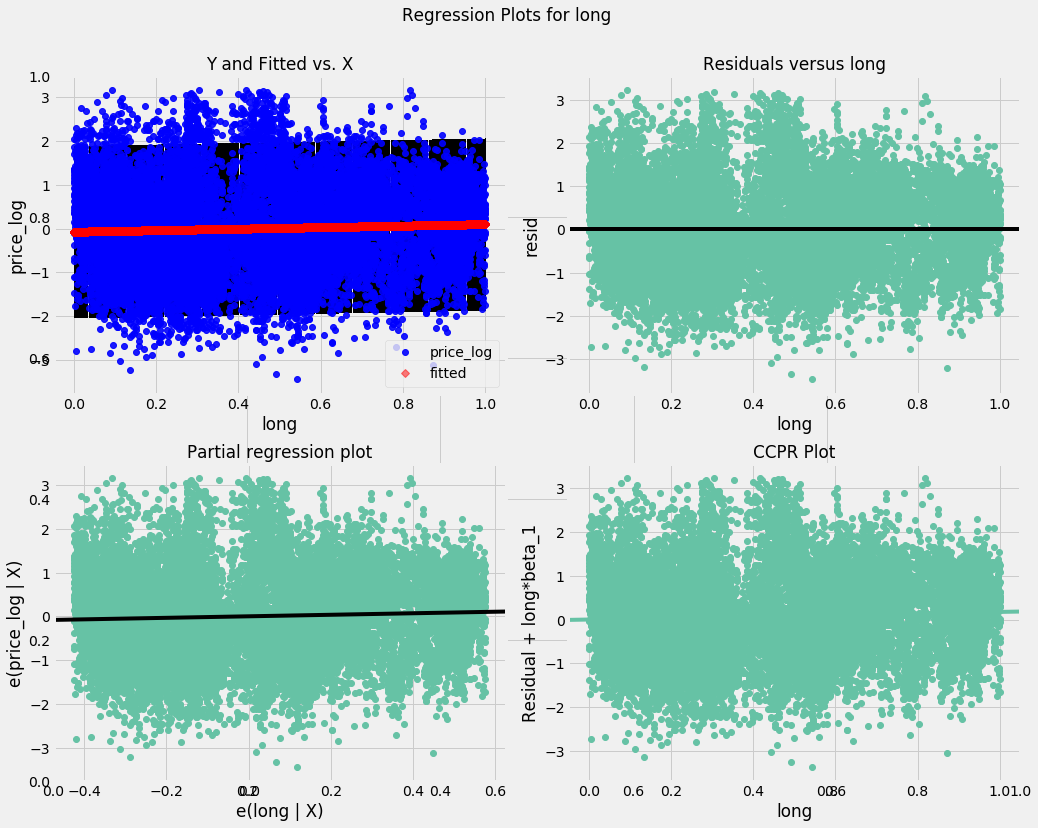

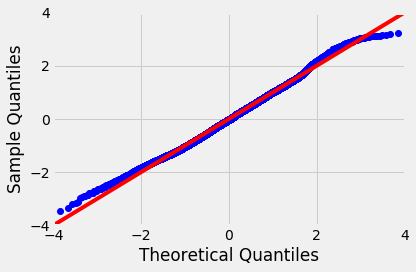

Regression Check~yr_built
-----------------------


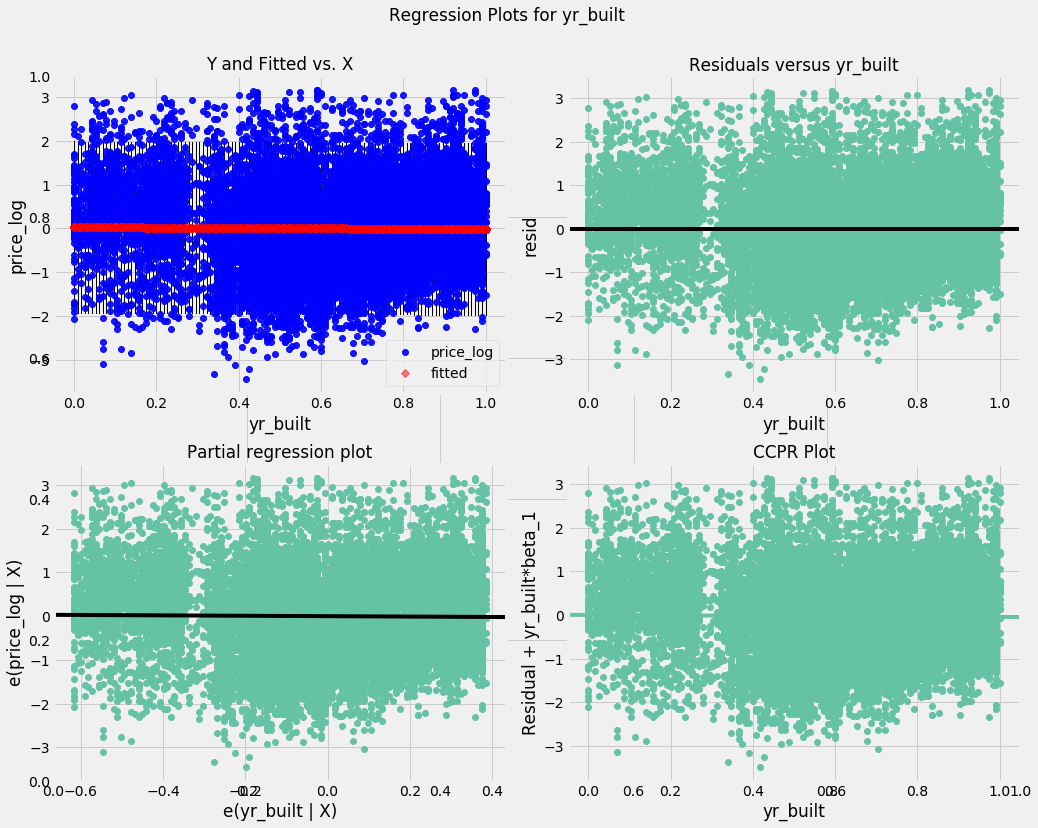

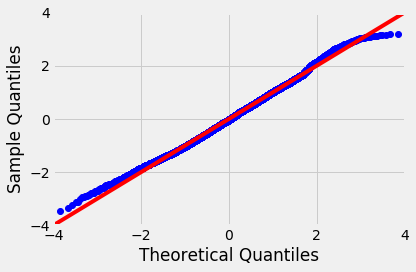

In [90]:
#Check continuous features for normality and homo/heterskedasticity
contcols.remove('price_log')
normresults2 = checknormhet(df_final, contcols, 'price_log')

<font color='blue'>

#### Observations:
* Not entirely the best display of normality nor heterskedasticity, but as close as I'm getting
</font>

In [91]:
#Review results from the regessions and the qqplots
pd.DataFrame(normresults2, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])

ind_var  r_squared     intercept     slope       p-value  \
0     sqft_lot_log   0.005405  2.344080e-13  0.073516  1.896829e-21   
1  sqft_living_log   0.347666  2.646303e-13  0.589632  0.000000e+00   
2   sqft_lot15_log   0.005585  2.314694e-13  0.074730  4.124731e-22   
3              lat   0.237180 -9.992372e-01  1.760928  0.000000e+00   
4             long   0.002390 -7.381693e-02  0.173805  2.618728e-10   
5         yr_built   0.000134  2.832292e-02 -0.045990  1.351575e-01   

   normality (JB)  
0       74.144038  
1       79.175348  
2       73.380130  
3      451.053249  
4      103.354836  
5       95.039060

In [92]:
#Check the correlation between features again - using 75% as correlation threshhold
corrdf2 = abs(df_final.corr())
corrdf2[(corrdf2.iloc[:,:] >= 0.75) & (corrdf2.iloc[:,:] < 1)].dropna(how='all').dropna(how='all', axis=1)

sqft_lot_log  sqft_lot15_log  condition_3  condition_4
sqft_lot_log             NaN        0.914244          NaN          NaN
sqft_lot15_log      0.914244             NaN          NaN          NaN
condition_3              NaN             NaN          NaN     0.813667
condition_4              NaN             NaN     0.813667          NaN

In [93]:
#Drop correlated features
df_final.drop(['sqft_lot15_log', 'condition_3'], axis=1, inplace=True)

<font color='blue'>

# Model - Using recursive feature elimination with cross validation
* Check regression result between price and the final dataframe - using statsmodels
* Explore the potential model using stepwise selection, RFE and train-test-split - using SKLearn, RFE
* Present final model by using RFE plus cross validation - using SKLearn, RFECV
</font>

In [94]:
def OLSmodel(X, y):
    '''Use statmodels to run regression
    '''
    X_int = sm.add_constant(X)
    model = sm.OLS(y, X_int).fit()
    return model

def plothat(linreg, x, y, ax):
    '''This method will plot y values vs predicted y values from a SKLearn linreg model.
    R2 and MSE values are added as text to the plot.
    '''
    y_hat = linreg.predict(x)
    
    ax.plot(y, y_hat, 'o')
    ax.plot(y, y, c='blue', linewidth=2)
    ax.set_title('y vs y_hat', fontsize=12)
    ax.set_xlabel('y')
    ax.set_ylabel('y_hat')
    
    mse = 'MSE: %.3f'% mean_squared_error(y, y_hat)
    r2 = 'R2: %.3f'% linreg.score(x, y)
    ax.text(-3.5, 3.6, mse, {'color': 'black', 'fontsize': 11})
    ax.text(-3.5, 3, r2, {'color': 'black', 'fontsize': 11})
    
def doubleplothat(linreg1, x1, y1, linreg2, x2, y2, title):
    '''This method will run the plothat method twice - once for two sets of linreg inputs.
    '''
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    fig.suptitle(title, fontsize=15)
    plothat(linreg1, x1, y1, ax1)
    plothat(linreg2, x2, y2, ax2)
    plt.tight_layout()
    plt.show()

def runrfe(x, y, name):
    '''This method will perform RFE for a linreg model. The best half of total features will be returned along with a 
    model fitted with those top features.
    '''
    linreg_rfe = LinearRegression()
    selector = RFE(linreg_rfe)
    selector = selector.fit(x, y)

    #select the top features - add to a list
    selected = []
    for n in range(len(selector.ranking_)):
        if selector.ranking_[n] == 1:
            selected.append(x.columns.tolist()[n])
    print(f'{name} Model')
    print(f'Resulting RFE Features: {len(selected)}')
    print(selected)
    print('')
    x_rfe = x[selected]
    model = linreg_rfe.fit(x_rfe, y)
    return x_rfe, model
    
def plottraintestsplit (x, y, size, title):
    '''This method will run train_test_split on an SKlearn linreg model, then use the plothat method to create a plot
    '''
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    doubleplothat(linreg, X_train, y_train, linreg, X_test, y_test, f'{title} - Train (Left)  Test(Right)')

def rfecv_r2mse(x, y, title):
    '''This method will use RFECV from SKlearn to get select the optimal number of features as well as to run 
    cross validation. I'd like to illustrate the optimal number of features by using plots of both R2 and MSE, 
    so I ran RFECV with R2 and MSE as scoring values.
    '''
    linreg = LinearRegression()
    #svr = SVR(kernel="linear")
    #R2
    rfecv_r2 = RFECV(estimator=linreg, cv=5, scoring=make_scorer(r2_score))
    rfecv_r2.fit(x, y)
    #MSE
    rfecv_mse = RFECV(estimator=linreg, cv=5, scoring=make_scorer(mean_squared_error))
    rfecv_mse.fit(x, y)
    #Combine scores into a dataframe for ease of use when plotting
    scores = pd.DataFrame(data={'R2': rfecv_r2.grid_scores_, 'MSE': rfecv_mse.grid_scores_})
    return scores, rfecv_r2, rfecv_mse


def selectfeatures(rfecv_model, colnames, numfeatures):
    '''Select the top x number of features from an rfecv model
    '''
    selected_rfecv = []
    for n in range(len(rfecv_model.ranking_)):
        if rfecv_model.ranking_[n] < numfeatures + 1:
            selected_rfecv.append(colnames[n])
    return selected_rfecv

def dollarprice(val):
    '''This method will convert the model price to a dollar price - display in thousands
    '''
    change = (np.exp((val * np.std(df_cont_log['price_log']) + np.mean(df_cont_log['price_log']))))/1000
    return change

In [95]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                #print(f'Add {best_feature} with p-value {best_pval}')
                print('Add  {:15} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = X[included].columns.to_list()[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                #print(f'Drop {worst_feature} with p-value {worst_pval}')
                print('Drop {:15} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [96]:
#Create df for X variables/features
X = df_final.drop('price_log', axis=1)
X_nozips = X.drop(X.filter(like='zip', axis=1).columns.to_list(), axis=1)

y = df_final['price_log']

In [97]:
#Run OLS model on df_final - include zips
model_df_final = OLSmodel(X, y)
model_df_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1032.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:36:38   Log-Likelihood:                -8432.4
No. Observations:               16693   AIC:                         1.703e+04
Df Residuals:                   16608   BIC:                         1.769e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.2329      0.042    -29.449      0.000      -1.315      -1.151
sqft_lot_log        0.1224      0.005     25.149      0.000       0.113       0.132
sqft_living_log     0.4744      0.005     94.238      0.000       0.465       0.484
waterfront          0.9082      0.059     15.367      0.000       0.792       1.024
basement           -0.1097      0.008    -13.569      0.000      -0.126      -0.094
bedrooms_3         -0.0562      0.011     -4.889      0.000      -0.079      -0.034
bedrooms_4         -0.0852      0.013     -6.474      0.000      -0.111      -0.059
bedrooms_5         -0.1754      0.017    -10.191      0.000      -0.209      -0.142
floors_1.5          0.0588      0.012      4.707      0.000       0.034       0.083
floors_2.0          0.0975      0.010      9.624      0.000       0.078       0.117
floors_2.5          0.1437      0.041      3.464      0.001       0.062       0.225
floors_3.0         -0.0602      0.023     -2.613      0.009      -0.105      -0.015
floors_3.5         -0.0886      0.165     -0.536      0.592      -0.413       0.235
view_1.0            0.3115      0.025     12.245      0.000       0.262       0.361
view_2.0            0.3666      0.017     22.108      0.000       0.334       0.399
view_3.0            0.5499      0.024     23.063      0.000       0.503       0.597
view_4.0            0.8714      0.037     23.654      0.000       0.799       0.944
condition_2        -0.2779      0.041     -6.753      0.000      -0.359      -0.197
condition_4         0.0556      0.008      6.978      0.000       0.040       0.071
condition_5         0.1889      0.012     15.188      0.000       0.165       0.213
zipcode_98002      -0.0673      0.049     -1.366      0.172      -0.164       0.029
zipcode_98003       0.0140      0.042      0.335      0.737      -0.068       0.096
zipcode_98004       2.3325      0.072     32.211      0.000       2.191       2.474
zipcode_98005       1.5594      0.076     20.407      0.000       1.410       1.709
zipcode_98006       1.3560      0.065     20.806      0.000       1.228       1.484
zipcode_98007       1.3082      0.080     16.397      0.000       1.152       1.465
zipcode_98008       1.2600      0.079     16.030      0.000       1.106       1.414
zipcode_98010       0.5345      0.077      6.987      0.000       0.385       0.684
zipcode_98011       0.6123      0.098      6.218      0.000       0.419       0.805
zipcode_98023      -0.0563      0.040     -1.414      0.157      -0.134       0.022
zipcode_98027       1.1282      0.072     15.777      0.000       0.988       1.268
zipcode_98028       0.4992      0.095      5.252      0.000       0.313       0.685
zipcode_98029       1.2580      0.084     14.936      0.000       1.093       1.423
zipcode_98030       0.0680      0.042      1.614      0.107

<font color='blue'>

#### Observations:
* The R2 and adj R2 are above 70%, which is good. F-stat prob is 0, which is also good.
* Nearly all p-values of the features all appear to be < 0.05


In [98]:
#RFE feature selected model - uses half the features (by default)
x_rfe_all, linreg_rfe_all = runrfe(X, y, 'All')
x_rfe_nozips, linreg_rfe_nozips = runrfe(X_nozips, y, 'No Zips')

#Plot y_hat vs y
doubleplothat(linreg_rfe_all, x_rfe_all, y, linreg_rfe_nozips, x_rfe_nozips, y, 'RFE - All (Left)  No Zips(Right)')

All Model
Resulting RFE Features: 42
['sqft_living_log', 'waterfront', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condition_2', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98027', 'zipcode_98029', 'zipcode_98033', 'zipcode_98039', 'zipcode_98040', 'zipcode_98052', 'zipcode_98053', 'zipcode_98059', 'zipcode_98074', 'zipcode_98075', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98107', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98126', 'zipcode_98136', 'zipcode_98144', 'zipcode_98166', 'zipcode_98177', 'zipcode_98199', 'lat']

No Zips Model
Resulting RFE Features: 11
['sqft_living_log', 'waterfront', 'floors_2.5', 'floors_3.5', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condition_2', 'lat', 'yr_built']



<font color='blue'>
    
#### Observations:
* Including zipcodes appears to greatly improve the model - R2 increase from 60% to 80%
* The features chosen suggest that sqft_living, waterfront, view, latitude, condition, yr_built matter the most in determing the properties value.
</font>

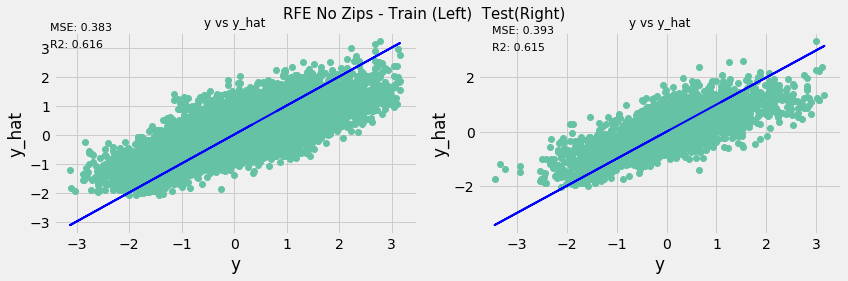

In [99]:
#Run traintestsplit
plottraintestsplit(x_rfe_all, y, 0.2, 'RFE All')
plottraintestsplit(x_rfe_nozips, y, 0.2, 'RFE No Zips')

<font color='blue'>
    
#### Observations:
* The models seem to hold up in the test group...the R2 and MSE values from the test data are roughly the same as observed for the training group.
* It would help to use cross validation to confirm that the model holds up
</font>

No handles with labels found to put in legend.


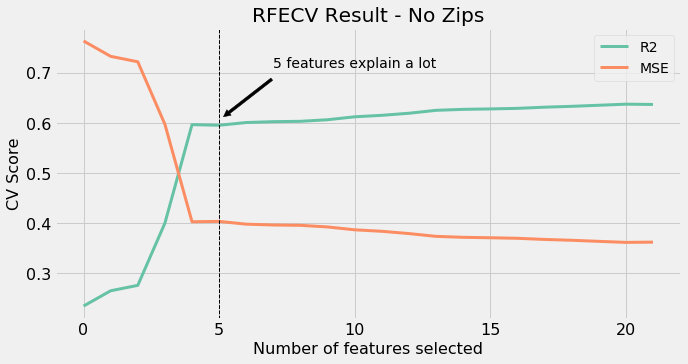

In [100]:
##Use RFECV to perform cross validation and determine optimal number of features
##The estimator used is LinearRegression(). Could use SVR with kernel without r2 scorer, but it takes long to run.
df_rfecv_all_scores,  rfecv_all_r2, rfecv_all_mse = rfecv_r2mse(X, y, 'All Features')
# Plot number of features VS. cross-validation scores
df_rfecv_all_scores.plot(legend=True, linewidth=3, figsize=(10, 5), fontsize=16)
plt.axvline(x=35, c='black', linewidth=1, linestyle='dashed')
plt.text(7.5, 0.95, "35 features look good", {'color': 'black', 'fontsize': 14})
plt.annotate("", xy=(34.6,0.82), xytext=(20, 0.9),
             arrowprops=dict(arrowstyle="simple", color='black'))
plt.xlabel("Number of features selected", fontsize=16)
plt.ylabel("CV Score", fontsize=16)
plt.title('RFECV Result - All Features')
#plt.savefig('All-r2', transparent=True)
plt.show();

print('\n')

df_rfecv_nozips_scores, rfecv_nozips_r2, rfecv_nozips_mse = rfecv_r2mse(X_nozips, y, 'No Zip Codes')
# Plot number of features VS. cross-validation scores
df_rfecv_nozips_scores.plot(legend=True, linewidth=3, figsize=(10, 5), fontsize=16)
plt.axvline(x=5, c='black', linewidth=1, linestyle='dashed')
plt.text(7, 0.71, "5 features explain a lot", {'color': 'black', 'fontsize': 14})
plt.annotate("", xy=(5.1,0.61), xytext=(7 , 0.69),
             arrowprops=dict(arrowstyle="simple", color='black'))
plt.xlabel("Number of features selected", fontsize=16)
plt.ylabel("CV Score", fontsize=16)
plt.title('RFECV Result - No Zips')
ax.legend(fancybox=True, framealpha=0.01, fontsize=14)
#plt.savefig('Nozips-r2', transparent=True)
plt.show();



<font color='blue'>
    
#### Observations:
* The All Features model suggests that you could explain approx 80% of the variability in prices with 35 of the features
* The No Zips model suggests that just 5 of the non-zipcode features could explain 60% of the variability in prices. 
</font>

In [101]:
#Check the top 35 features, as well as the top 5 non-zipcode features
selected35_rfecv_all = selectfeatures(rfecv_all_mse, X.columns.to_list(),35)
selected5_rfecv_nozips = selectfeatures(rfecv_nozips_mse, X_nozips.columns.to_list(),5)

print('Resulting Features - Top 35:')
print(selected35_rfecv_all)
print('')
print('Resulting Features - Top 5 No Zips:')
print(selected5_rfecv_nozips)

Resulting Features - Top 35:
['sqft_living_log', 'waterfront', 'view_3.0', 'view_4.0', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98027', 'zipcode_98029', 'zipcode_98033', 'zipcode_98039', 'zipcode_98040', 'zipcode_98052', 'zipcode_98053', 'zipcode_98074', 'zipcode_98075', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105', 'zipcode_98107', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98119', 'zipcode_98122', 'zipcode_98126', 'zipcode_98136', 'zipcode_98144', 'zipcode_98199', 'lat']

Resulting Features - Top 5 No Zips:
['sqft_living_log', 'waterfront', 'view_3.0', 'view_4.0', 'lat']


<font color='blue'>
    
#### Observations:
* The top five features include the best views, lat, sqft_living and whether the property is waterfront. Those features are echoed by the All Features model. The top 5 features make sense given that King County is in/around Seattle, WA.
</font>

In [102]:
#Use the stepwise custom method to select features based on p-values
stepwise_vars = stepwise_selection(X, y, verbose=True)

C:\Users\kvd51\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  sqft_living_log with p-value 0.0
Add  lat             with p-value 0.0
Add  zipcode_98004   with p-value 1.78081e-212
Add  zipcode_98040   with p-value 6.98241e-158
Add  view_4.0        with p-value 3.22998e-152
Add  zipcode_98155   with p-value 2.71129e-158
Add  zipcode_98133   with p-value 2.04856e-158
Add  zipcode_98028   with p-value 2.57609e-165
Add  zipcode_98112   with p-value 6.46315e-143
Add  zipcode_98034   with p-value 4.78308e-122
Add  zipcode_98011   with p-value 1.33049e-130
Add  zipcode_98072   with p-value 9.23187e-123
Add  zipcode_98125   with p-value 2.72433e-128
Add  zipcode_98077   with p-value 3.24017e-96
Add  zipcode_98177   with p-value 2.6181e-108
Add  zipcode_98168   with p-value 1.52453e-101
Add  view_2.0        with p-value 3.92975e-80
Add  view_3.0        with p-value 5.53005e-89
Add  zipcode_98178   with p-value 1.69752e-94
Add  zipcode_98039   with p-value 2.49382e-55
Add  zipcode_98006   with p-value 4.29121e-57
Add  zipcode_98119   with p-value 2.40

In [103]:
#Check the number of chosen features
len(stepwise_vars)

71

In [104]:
#Run final regressions based on various # feature selections
model_stepwise = OLSmodel(df_final[stepwise_vars], y)
model_35 = OLSmodel(df_final[selected35_rfecv_all], y)
model_5_nozips = OLSmodel(df_final[selected5_rfecv_nozips], y)

model_stepwise.summary()
#model_35.summary()
#model_5_nozips.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1217.
Date:                Wed, 15 Jul 2020   Prob (F-statistic):               0.00
Time:                        05:41:13   Log-Likelihood:                -8457.5
No. Observations:               16693   AIC:                         1.706e+04
Df Residuals:                   16621   BIC:                         1.762e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.3063      0.022    -59.034      0.000      -1.350      -1.263
sqft_living_log     0.4725      0.005     94.926      0.000       0.463       0.482
lat                 0.9953      0.021     46.871      0.000       0.954       1.037
zipcode_98004       1.9696      0.028     70.112      0.000       1.915       2.025
zipcode_98040       1.6432      0.029     56.313      0.000       1.586       1.700
view_4.0            0.8706      0.037     23.630      0.000       0.798       0.943
zipcode_98133       0.1762      0.024      7.222      0.000       0.128       0.224
zipcode_98112       1.8712      0.031     61.232      0.000       1.811       1.931
zipcode_98034       0.3572      0.023     15.708      0.000       0.313       0.402
zipcode_98177       0.4709      0.031     15.209      0.000       0.410       0.532
zipcode_98168      -0.2530      0.029     -8.709      0.000      -0.310      -0.196
view_2.0            0.3667      0.017     22.133      0.000       0.334       0.399
view_3.0            0.5475      0.024     23.008      0.000       0.501       0.594
zipcode_98178      -0.1194      0.029     -4.153      0.000      -0.176      -0.063
zipcode_98039       2.3554      0.081     28.956      0.000       2.196       2.515
zipcode_98006       1.0365      0.022     47.154      0.000       0.993       1.080
zipcode_98119       1.7025      0.035     48.554      0.000       1.634       1.771
zipcode_98109       1.7589      0.042     41.504      0.000       1.676       1.842
zipcode_98102       1.7708      0.046     38.907      0.000       1.682       1.860
zipcode_98122       1.3944      0.029     48.463      0.000       1.338       1.451
zipcode_98105       1.5650      0.032     48.491      0.000       1.502       1.628
basement           -0.1029      0.008    -13.353      0.000      -0.118      -0.088
zipcode_98136       1.1047      0.029     37.739      0.000       1.047       1.162
zipcode_98116       1.2199      0.029     41.685      0.000       1.163       1.277
sqft_lot_log        0.1241      0.005     26.505      0.000       0.115       0.133
zipcode_98053       0.5812      0.027     21.490      0.000       0.528       0.634
waterfront          0.9083      0.059     15.378      0.000       0.793       1.024
floors_2.0          0.1093      0.009     12.030      0.000       0.092       0.127
condition_5         0.1898      0.012     15.281      0.000       0.165       0.214
zipcode_98027       0.8052      0.024     33.080      0.000       0.758       0.853
view_1.0            0.3110      0.025     12.238      0.000       0.261       0.361
zipcode_98005       1.1908      0.035     34.240      0.000       1.123       1.259
zipcode_98188      -0.0860      0.038     -2.262      0.024      -0.161      -0.011
zipcode_98056       0.2977      0.023     13.110      0.000

<font color='blue'>
    
# Final model notes - based on stepwise selection function:
The final model has 71 features that explain over 80% of the variability in the price of properties in the King County data set that sold for up to $2 million and meet certain criteria - see above. I started with cleaning the data and eliminating outliers and collinearity, followed by creating dummy variables for 'bedrooms', 'floors', 'view', 'condition', 'zipcode.' Additionally, I changed 'basement' to a binomial because nearly all values were 0. Then, I arrived at my final model by either log transforming and normalizing or simply scaling features (get data close to normal distribution) followed by performing recursive feature selection with cross validation. 

The top 5 non-zipcode features, with ranks shown, are: (5) 'sqft_living', (4) 'waterfront', (3) 'view_3.0', (2) 'view_4.0', (1) 'lat.' Thus, location, square footage, the best views and whether the property is on water impact price the most. The p-values are all positive - need to reverse the price log transformation to determin exact impact each feature has on price.
</font>

# Items for the presentation - code is not commented

In [105]:
def scatter_date(df, x, y, datetimeformat):
    if not isinstance(y, list):
        y = [y]
    for yi in y:
        plt.plot_date(df[x].apply(
            lambda z: mpl.dates.date2num(
                datetime.strptime(z, datetimeformat))), df[yi], mfc='midnightblue', 
                      mec='silver', label=yi)
    plt.xlabel(x, {'fontsize':12})
    plt.ylabel('sales price ($millions)', {'fontsize':12})
    
df_plot = df.copy()
df_plot.price = df_plot.price.apply(lambda x: x/1000000)
fig = plt.figure(figsize=(8, 5))
scatter_date(df_plot, x='date', y='price', datetimeformat='%m/%d/%Y')
#plt.savefig('Prices', transparent=True)



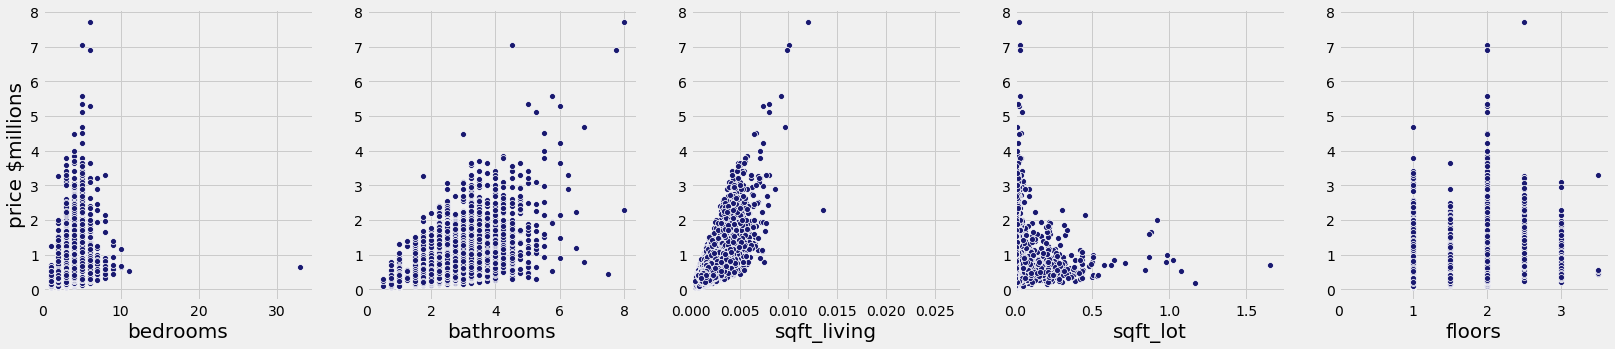

In [106]:
df_clean2 = df.copy()
coladjust = ['price', 'sqft_living', 'sqft_lot']
for col in coladjust:
    df_clean2[col] = df_clean2[col].apply(lambda x: x/1000000)
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1, ncols=5, figsize=(25,5))
axs = [ax1, ax2, ax3, ax4, ax5]
sns.axes_style({'grid.color': '.05', 'grid.linestyle':'-'})

for index, col in enumerate(columns):
    sns.scatterplot(x=col, y='price', data=df_clean2, ax=axs[index], color='midnightblue')
    #df_clean2.plot.scatter(x=col, y='price', ax=axs[index], color='b', fontsize=16)

for i in range(len(axs)):
    ax=axs[i]
    ax.set_xlim(0,)
    ax.set_ylabel('')
    ax.set_xlabel(columns[i], fontsize=20)
    
ax1.set_ylabel('price $millions', fontsize=20)
#plt.savefig('scatters', transparent=True)
plt.show();


Text(0, 0.5, 'bedrooms')

Text(0, 0.5, 'bathrooms')

Text(0, 0.5, 'sqft_living')

Text(0, 0.5, 'sqft_lot')

Text(0, 0.5, 'floors')

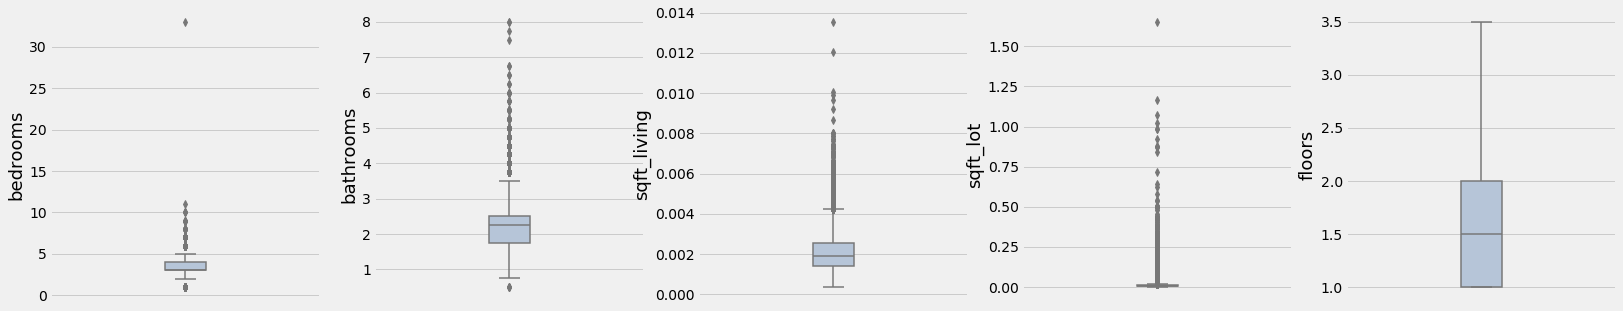

In [107]:
fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1, ncols=5, figsize=(25,5))
axs = [ax1, ax2, ax3, ax4, ax5]

for i, col in enumerate(columns):
    sns.boxplot(y=col, data=df_clean2, ax=axs[i], color='lightsteelblue', width=0.15, linewidth=1.5)
    axs[i].set_ylabel(columns[i], fontsize=18)
    #df_clean2[col].plot.box(ax=axs[index], color='b', fontsize=18)

#plt.subplots_adjust(wspace=0.3, hspace=0.3)
#plt.savefig('box', transparent=True);
#plt.show();

In [108]:
#Create a method for plotting y vs predicted y values from model results - effectively looking at variability of resids.
def zip_annotate(x,y,text,ax):
    #ax.text(x-50, y+525, text, {'color': 'black', 'fontsize': 13})
    ax.annotate(text, xy=(x, y+40), xytext=(x, y+500), 
                arrowprops=dict(arrowstyle='simple', color='black'))
    
def plothat2(linreg, y, hue, ax):
    '''This method will plot y values vs predicted y values from a SKLearn linreg model.
    R2 and MSE values are added as text to the plot.
    '''
    y_hat = linreg.predict()
    y_hat_dollar = dollarprice(y_hat)
    y_dollar = dollarprice(y)
    
    df_yhat = pd.DataFrame(data={'y_dollar': y_dollar, 'y_hat_dollar': y_hat_dollar, 'zips': df_clean_dropped.zipcode})
    for col in ['sqft_living', 'lat', 'waterfront', 'view']:
        df_yhat[col]=df_clean_dropped[col]
    
    bins_SL = pd.interval_range(start=df_yhat['sqft_living'].min(), end=df_yhat['sqft_living'].max(), freq=500)
    df_yhat['sqft_living_group'] = pd.cut(df_yhat['sqft_living'], bins_SL, labels=False)
    bins_lat = pd.interval_range(start=df_yhat['lat'].min(), end=df_yhat['lat'].max(), periods=5)
    df_yhat['lat_group'] = pd.cut(df_yhat['lat'], bins_lat, labels=False)
    
    if hue == 'sqft_living' or hue == 'lat':
        hue = hue+'_group'
    
    df_grouped = df_yhat.groupby(hue).mean().reset_index()
    df_grouped['PP_diff'] = df_grouped.y_hat_dollar.diff()
    
    legend = 'full'
    if hue == 'zips':
        legend = False
    
    ax.plot(y_dollar, y_hat_dollar, 'o', color='ivory', mec='g', zorder=-2, alpha=0.5)
    ax.plot(y_dollar, y_dollar, c='midnightblue', linestyle='-', linewidth=2, zorder=-1)
    
    sns.scatterplot(x='y_dollar', y='y_hat_dollar', hue=hue, size=hue, sizes=(125, 125), palette='tab20c', 
                    legend=legend,  data=df_grouped, ax=ax)
    
    if hue =='zips':
        zip_max = df_grouped.query('y_hat_dollar==y_hat_dollar.max()')[hue].item()
        zip_median = df_grouped.query('y_hat_dollar==y_hat_dollar.median()')[hue].item()
        zip_min = df_grouped.query('y_hat_dollar==y_hat_dollar.min()')[hue].item()
        zip_annotate(df_grouped.y_dollar.min(), df_grouped.y_hat_dollar.min(), zip_min, ax)
        zip_annotate(df_grouped.y_dollar.median(), df_grouped.y_hat_dollar.median(), zip_median, ax)
        zip_annotate(df_grouped.y_dollar.max(), df_grouped.y_hat_dollar.max(), zip_max, ax)
        
    ax.legend(fancybox=True, framealpha=0.01, fontsize=11)
    ax.set_xlabel('Price - $000s', fontsize=13)
    ax.set_ylabel('Predicted Price - $000s', fontsize=13)
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    return df_grouped

Text(0.5, 0.92, 'Price vs Predicted Price - Avg By Variable')

sqft_living_group    y_dollar  y_hat_dollar          zips  sqft_living  \
0      (1000, 1500]  368.254122    358.131329  98094.321503  1275.318952   
1      (1500, 2000]  440.234706    439.525383  98082.356402  1747.569101   
2      (2000, 2500]  539.364509    539.019429  98074.829536  2238.256931   
3      (2500, 3000]  671.847159    657.812151  98069.596198  2729.582754   
4      (3000, 3500]  817.958122    780.975694  98064.639903  3222.473642   
5      (3500, 4000]  976.692387    922.464513  98062.967914  3722.741533   

         lat  waterfront      view     PP_diff  
0  47.574212    0.001160  0.058455         NaN  
1  47.564133    0.002328  0.117884   81.394054  
2  47.566061    0.004392  0.213011   99.494046  
3  47.576051    0.010663  0.351414  118.792722  
4  47.580106    0.009732  0.442822  123.163542  
5  47.597281    0.005348  0.590018  141.488819

112.86663670859707


waterfront     y_dollar  y_hat_dollar          zips  sqft_living  \
0         0.0   515.882062     506.62794  98080.120075  2030.084642   
1         1.0  1192.677857    1160.76229  98119.400000  2507.357143   

         lat      view     PP_diff  
0  47.571220  0.177886         NaN  
1  47.532421  3.900000  654.134349

654.1343491813527


view     y_dollar  y_hat_dollar          zips  sqft_living        lat  \
0   0.0   493.884510    485.032359  98078.405352  1990.220114  47.570319   
1   1.0   713.760483    703.018859  98097.988679  2419.301887  47.577933   
2   2.0   714.688750    703.125569  98100.186260  2385.039695  47.581999   
3   3.0   832.250997    813.031452  98101.275410  2642.121311  47.578639   
4   4.0  1080.290773   1055.990454  98105.118919  2680.621622  47.570931   

   waterfront     PP_diff  
0    0.000000         NaN  
1    0.000000  217.986500  
2    0.003053    0.106710  
3    0.009836  109.905883  
4    0.351351  242.959002

142.73952380770345


lat_group    y_dollar  y_hat_dollar          zips  sqft_living  \
0  (47.3001, 47.3956]  308.393440    304.404578  98040.595639  1983.067712   
1  (47.3956, 47.4911]  354.844369    355.722338  98093.168884  1989.658649   
2  (47.4911, 47.5866]  532.537478    518.841903  98087.191204  2060.709771   
3  (47.5866, 47.6821]  711.799542    688.036088  98083.269126  2094.991087   
4  (47.6821, 47.7776]  527.576368    527.724868  98089.695196  1996.783116   

         lat  waterfront      view     PP_diff  
0  47.349361    0.004208  0.100612         NaN  
1  47.450685    0.005629  0.155578   51.317761  
2  47.541267    0.007374  0.302344  163.119565  
3  47.638903    0.002228  0.221342  169.194185  
4  47.723593    0.002565  0.144823 -160.311220

55.83007255786603


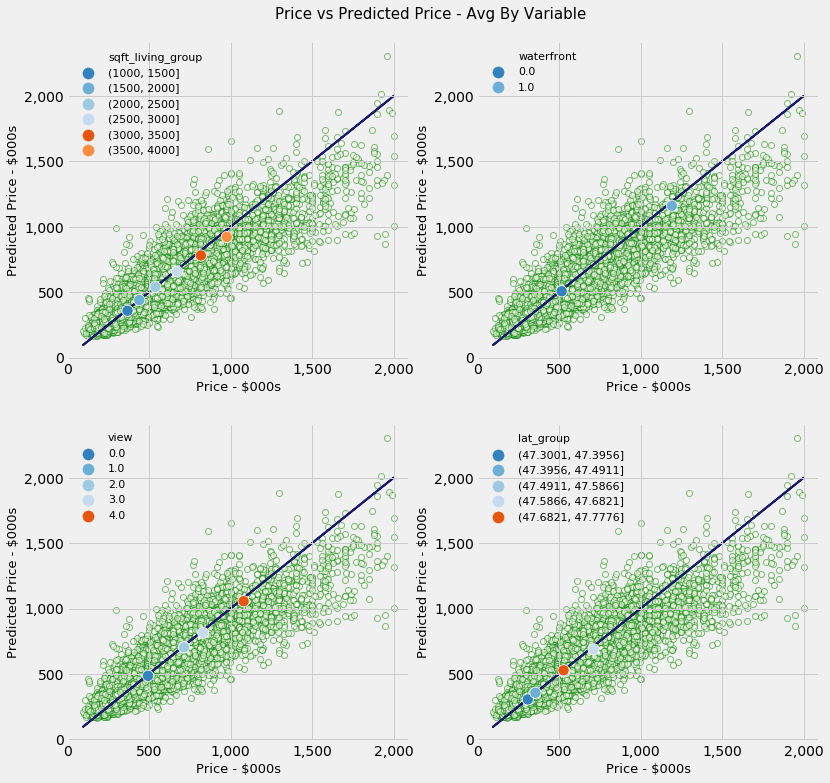

In [109]:
hues = ['sqft_living_group', 'waterfront', 'view', 'lat_group']
fig, axs = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Price vs Predicted Price - Avg By Variable', fontsize=15, y=0.92)
for i in range(len(hues)):
    df = plothat2(model_stepwise, y, hues[i], axs[(i+2)//len(hues),(i*i%len(hues))])
    df.head(6)
    print(df.PP_diff.mean())
#plt.savefig('PvsPP', transparent=True, bbox_inches='tight')
#plt.show();


Text(0.5, 0.95, 'Price vs Predicted Price - Avg By Zipcode')

No handles with labels found to put in legend.


zips     y_dollar  y_hat_dollar  sqft_living        lat  waterfront  \
0   98001   291.665264    288.775998  1959.725962  47.331699    0.000000   
1   98002   239.951185    239.112906  1664.518519  47.323598    0.000000   
2   98003   286.999419    278.825605  1862.245810  47.334789    0.000000   
3   98004  1092.054604   1069.191725  2408.979167  47.614930    0.000000   
4   98005   764.349115    760.221627  2445.000000  47.608524    0.000000   
..    ...          ...           ...          ...        ...         ...   
58  98177   607.517545    593.022958  2193.513514  47.743411    0.004505   
59  98178   325.190733    316.334184  1851.797235  47.499403    0.041475   
60  98188   296.527393    290.792186  1865.358974  47.446836    0.000000   
61  98198   308.829806    309.765916  1815.785425  47.390473    0.032389   
62  98199   655.972728    648.448531  1935.537975  47.648260    0.000000   

        view     PP_diff  
0   0.105769         NaN  
1   0.000000  -49.663092  
2   0.268156   39.712699  
3   0.175000  790.366120  
4   0.108108 -308.970098  
..       ...         ...  
58  0.675676  341.109556  
59  0.571429 -276.688774  
60  0.128205  -25.541998  
61  0.603239   18.973730  
62  0.310127  338.682616  

[63 rows x 8 columns]

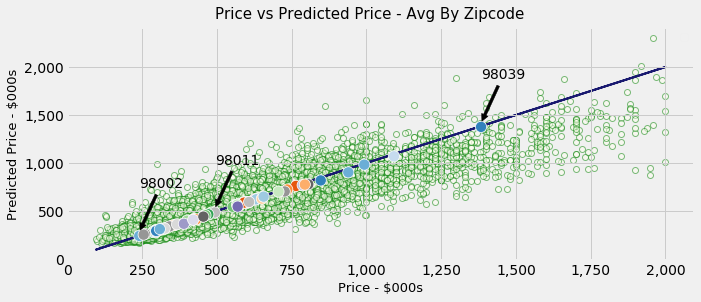

In [110]:
fig, ax1 = plt.subplots(figsize=(10,4))
fig.suptitle('Price vs Predicted Price - Avg By Zipcode', fontsize=15, y=0.95)
plothat2(model_stepwise, y, 'zips', ax1)
#plt.savefig('PvsPP_zips', transparent=True, bbox_inches='tight');

In [111]:
df_98039 = df_clean_dropped.query('zipcode == 98039 and waterfront == 0 and view == 0')
df_98039.head()

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  view  \
3158   875000.0         3         1220      8119     1.0         0.0   0.0   
3159   940000.0         3         1220      8119     1.0         0.0   0.0   
3698   937500.0         3         1320      8500     1.0         0.0   0.0   
5309  1560000.0         5         2870     16238     2.0         0.0   0.0   
5796  1400000.0         5         2640     14959     1.0         0.0   0.0   

      condition  sqft_basement  yr_built  zipcode      lat     long  \
3158          4            0.0      1955    98039  47.6328 -122.236   
3159          4            0.0      1955    98039  47.6328 -122.236   
3698          4            0.0      1954    98039  47.6187 -122.226   
5309          4            0.0      1962    98039  47.6308 -122.238   
5796          4          870.0      1929    98039  47.6191 -122.234   

      sqft_lot15  
3158        8119  
3159        8119  
3698       10800  
5309       16238  
5796       17904

In [112]:
df_98039.sqft_living.mean()

2515.0

In [113]:
df_98002 = df_clean_dropped.query('zipcode == 98002 and waterfront == 0 and view == 0')
df_98002.head()

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  view  \
14   189000.0         2         1200      9850     1.0         0.0   0.0   
21   233000.0         3         1710      4697     1.5         0.0   0.0   
199  225000.0         3         1300      8316     1.0         0.0   0.0   
452  266000.0         3         1805      3402     2.0         0.0   0.0   
496  214000.0         3         1200      8316     1.0         0.0   0.0   

     condition  sqft_basement  yr_built  zipcode      lat     long  sqft_lot15  
14           4            0.0      1921    98002  47.3089 -122.210        5095  
21           5            0.0      1941    98002  47.3048 -122.218        4705  
199          4            0.0      1954    98002  47.3221 -122.216        8316  
452          3            0.0      2009    98002  47.3521 -122.212        3402  
496          4            0.0      1953    98002  47.3221 -122.215        8316

In [114]:
df_98002.query('sqft_living == sqft_living.max()')

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  view  \
12236  265000.0         5         2920      5250     1.5         0.0   0.0   

       condition  sqft_basement  yr_built  zipcode      lat     long  \
12236          5         1120.0      1911    98002  47.3072 -122.221   

       sqft_lot15  
12236        5250

In [115]:
df_pred_present = df_98002.query('sqft_living == sqft_living.max()').reset_index()
df_pred_present = pd.concat([df_pred_present]*6).reset_index(drop=True)
df_pred_present.sqft_living.iloc[1] = 3420
df_pred_present.zipcode.iloc[2:] = 98039
df_pred_present.sqft_living.iloc[3:] = 3420
df_pred_present.zipcode.iloc[2:] = 98039
df_pred_present.waterfront.iloc[4] = 1
df_pred_present.view.iloc[5] = 4
df_pred_present.lat.iloc[2:] = 47.6328

df_pred_present.drop('index', axis=1, inplace=True)
df_pred_present.head(6)

C:\Users\kvd51\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


price  bedrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  265000.0         5         2920      5250     1.5         0.0   0.0   
1  265000.0         5         3420      5250     1.5         0.0   0.0   
2  265000.0         5         2920      5250     1.5         0.0   0.0   
3  265000.0         5         3420      5250     1.5         0.0   0.0   
4  265000.0         5         3420      5250     1.5         1.0   0.0   
5  265000.0         5         3420      5250     1.5         0.0   4.0   

   condition  sqft_basement  yr_built  zipcode      lat     long  sqft_lot15  
0          5         1120.0      1911    98002  47.3072 -122.221        5250  
1          5         1120.0      1911    98002  47.3072 -122.221        5250  
2          5         1120.0      1911    98039  47.6328 -122.221        5250  
3          5         1120.0      1911    98039  47.6328 -122.221        5250  
4          5         1120.0      1911    98039  47.6328 -122.221        5250  
5          5         1120.0      1911    98039  47.6328 -122.221        5250

In [116]:
def create_pp_final(df):

    df_final =  df_clean_dropped.copy()
    df_final = pd.concat([df_final, df], ignore_index=True)

    #Change 'sqft_basement' to a binomial and make 'long' positive
    df_final['basement'] = df_final['sqft_basement'].apply(lambda x: 1 if x > 0 else 0 )
    df_final.drop(['sqft_basement'], axis=1, inplace=True)

    #Create dummies for categorical features
    categoricals = ['bedrooms', 'floors', 'view', 'condition', 'zipcode']
    df_final = pd.get_dummies(df_final, prefix=categoricals, columns=categoricals, drop_first=True)

    #Log transform the continuous variables and normalize them
    continuous = ['price', 'sqft_lot', 'sqft_living', 'sqft_lot15']
    df_cont = df_final[continuous]
    df_final.drop(continuous, axis=1, inplace=True)
    log_names = [f'{col}_log' for col in df_cont.columns]
    df_cont_log = np.log(df_cont)
    df_cont_log.columns = log_names

    #Normalize the continuous features - done with std
    df_cont_log_norm = df_cont_log.apply(normalize)
    
    lat = df_final['lat']
    long = df_final['long']
    yb = df_final['yr_built']
    df_final['lat'] = df_final['lat'].apply(lambda x: (x - lat.min()) / (lat.max() - lat.min()))
    df_final['long'] = df_final['long'].apply(lambda x: (x - long.min()) / (long.max() - long.min()))
    df_final['yr_built'] = df_final['yr_built'].apply(lambda x: (x - yb.min()) / (yb.max() - yb.min()))
    
    #df_final.drop(['sqft_lot15_log', 'condition_3'], axis=1, inplace=True)
    

    #Put all together into one dataframe
    df_final = pd.concat([df_cont_log_norm, df_final], axis=1)
    return df_final

In [117]:
df_pp_final = create_pp_final(df_pred_present)
Xnew = df_pp_final[stepwise_vars].tail(6)
Xnew = sm.add_constant(Xnew, has_constant='add')
y_hat = model_stepwise.predict(Xnew)
dollarprice(y_hat)

16693     315.126923
16694     349.477288
16695    1332.846690
16696    1478.133451
16697    2247.851911
16698    2209.089734
dtype: float64

In [118]:
len(df_pp_final[stepwise_vars].columns.to_list())

71

In [119]:
[col for col in df_pp_final.columns.to_list() if col not in stepwise_vars]
[col for col in stepwise_vars if col not in df_pp_final.columns.to_list()]

['price_log',
 'sqft_lot15_log',
 'long',
 'floors_3.0',
 'floors_3.5',
 'condition_3',
 'zipcode_98003',
 'zipcode_98023',
 'zipcode_98028',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98042',
 'zipcode_98055',
 'zipcode_98148',
 'zipcode_98155',
 'zipcode_98198']

[]